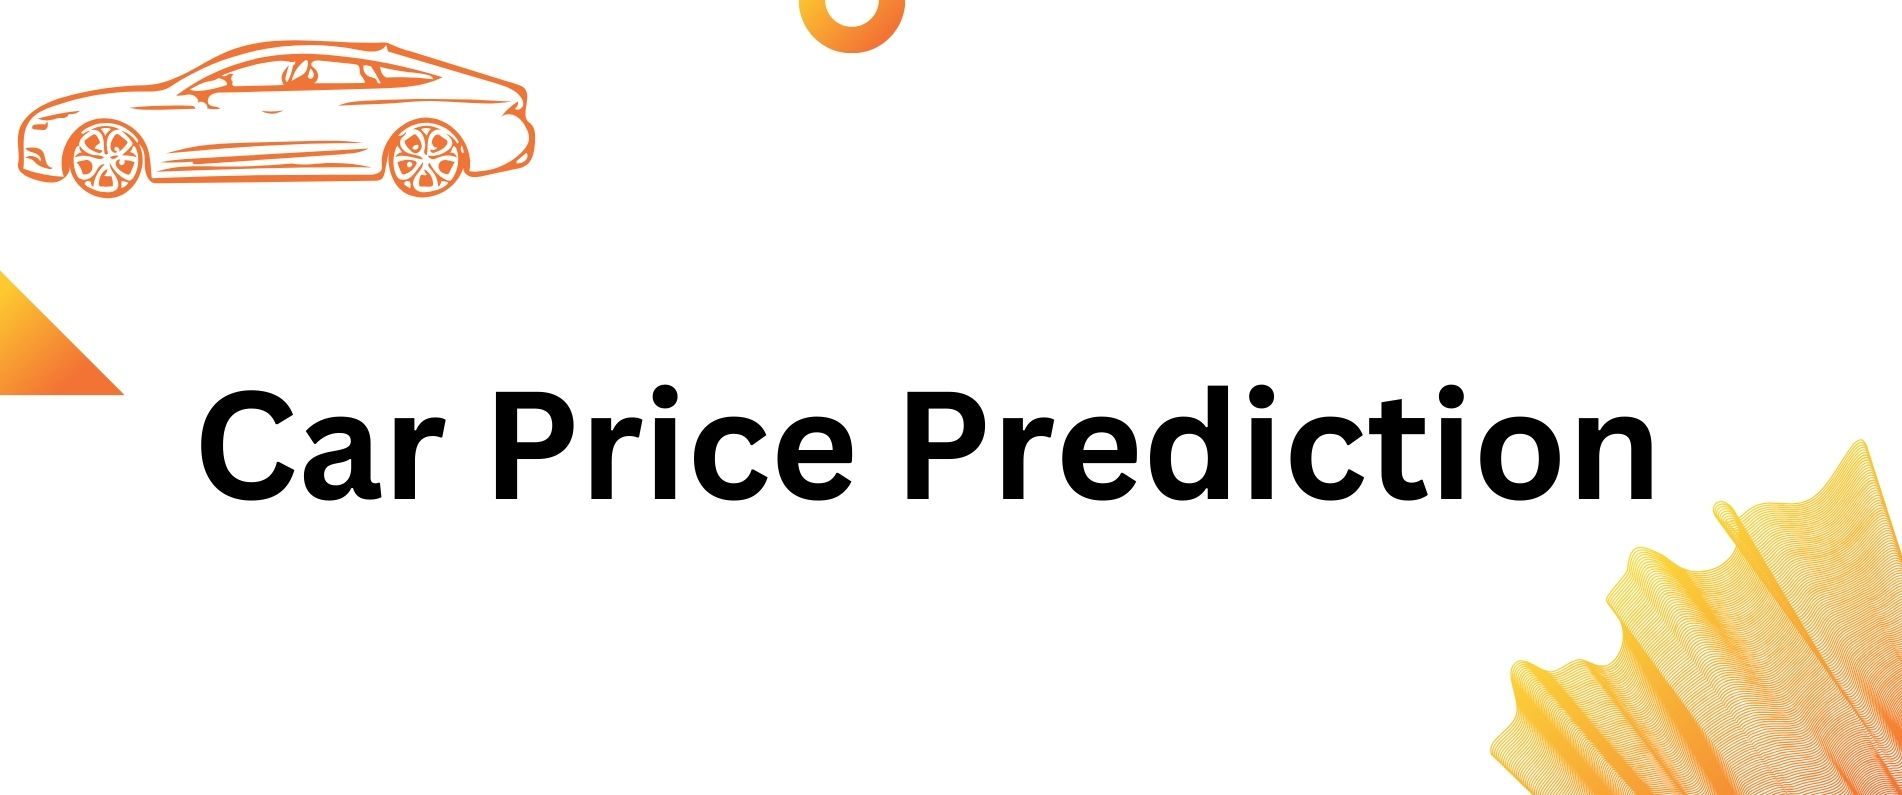

**Business Case:**<br>
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.<br>
    <i>The aim is to predict the price of car using all the provided features.</i>

_**PROJECT PROCESS STEPS**_:
- 1). **Importing all the neccesary libraries**
- 2). **Understanding the data/ Insights from data**
- 3). **Exploratory Data Analysis (EDA)**
- 4). **Data Pre-processing**
- 5). **Feature Selection**
- 6). **Model Creation and Evaluation**
- 7). **Conclusion**

# **Import Basic Modules**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Reading csv file

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df = pd.read_csv("auto_imports.csv",header=None)
df

0    1              2       3      4     5            6    7      8   \
0     3    ?    alfa-romero     gas    std   two  convertible  rwd  front   
1     3    ?    alfa-romero     gas    std   two  convertible  rwd  front   
2     1    ?    alfa-romero     gas    std   two    hatchback  rwd  front   
3     2  164           audi     gas    std  four        sedan  fwd  front   
4     2  164           audi     gas    std  four        sedan  4wd  front   
5     2    ?           audi     gas    std   two        sedan  fwd  front   
6     1  158           audi     gas    std  four        sedan  fwd  front   
7     1    ?           audi     gas    std  four        wagon  fwd  front   
8     1  158           audi     gas  turbo  four        sedan  fwd  front   
9     2  192            bmw     gas    std   two        sedan  rwd  front   
10    0  192            bmw     gas    std  four        sedan  rwd  front   
11    0  188            bmw     gas    std   two        sedan  rwd  front   
12    0  188            bmw     gas    std  four        sedan  rwd  front   
13    1    ?            bmw     gas    std  four        sedan  rwd  front   
14    0    ?            bmw     gas    std  four        sedan  rwd  front   
15    0    ?            bmw     gas    std   two        sedan  rwd  front   
16    0    ?            bmw     gas    std  four        sedan  rwd  front   
17    2  121      chevrolet     gas    std   two    hatchback  fwd  front   
18    1   98      chevrolet     gas    std   two    hatchback  fwd  front   
19    0   81      chevrolet     gas    std  four        sedan  fwd  front   
20    1  118          dodge     gas    std   two    hatchback  fwd  front   
21    1  118          dodge     gas    std   two    hatchback  fwd  front   
22    1  118          dodge     gas  turbo   two    hatchback  fwd  front   
23    1  148          dodge     gas    std  four    hatchback  fwd  front   
24    1  148          dodge     gas    std  four        sedan  fwd  front   
25    1  148          dodge     gas    std  four        sedan  fwd  front   
26    1  148          dodge     gas  turbo     ?        sedan  fwd  front   
27   -1  110          dodge     gas    std  four        wagon  fwd  front   
28    3  145          dodge     gas  turbo   two    hatchback  fwd  front   
29    2  137          honda     gas    std   two    hatchback  fwd  front   
30    2  137          honda     gas    std   two    hatchback  fwd  front   
31    1  101          honda     gas    std   two    hatchback  fwd  front   
32    1  101          honda     gas    std   two    hatchback  fwd  front   
33    1  101          honda     gas    std   two    hatchback  fwd  front   
34    0  110          honda     gas    std  four        sedan  fwd  front   
35    0   78          honda     gas    std  four        wagon  fwd  front   
36    0  106          honda     gas    std   two    hatchback  fwd  front   
37    0  106          honda     gas    std   two    hatchback  fwd  front   
38    0   85          honda     gas    std  four        sedan  fwd  front   
39    0   85          honda     gas    std  four        sedan  fwd  front   
40    0   85          honda     gas    std  four        sedan  fwd  front   
41    1  107          honda     gas    std   two        sedan  fwd  front   
42    0    ?          isuzu     gas    std  four        sedan  rwd  front   
43    2    ?          isuzu     gas    std   two    hatchback  rwd  front   
44    0  145         jaguar     gas    std  four        sedan  rwd  front   
45    0    ?         jaguar     gas    std  four        sedan  rwd  front   
46    0    ?         jaguar     gas    std   two        sedan  rwd  front   
47    1  104          mazda     gas    std   two    hatchback  fwd  front   
48    1  104          mazda     gas    std   two    hatchback  fwd  front   
49    1  104          mazda     gas    std   two    hatchback  fwd  front   
50    1  113          mazda     gas    std  four        sedan  fwd  front   
5

**Domain Analysis**<br>
  1) symboling:                This rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe. (-3, -2, -1, 0, 1, 2, 3.)<br>
  2) normalized-losses:        This factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year. (continuous from 65 to 256)<br>
  3) make:                     This represents the maker/make of auto. (alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo)<br>
  4) fuel-type:                Type of fuel used in engine. (diesel, gas)<br> 
  5) aspiration:               If the auto has turbo or natually aspirated engine. (std, turbo)<br>
  6) num-of-doors:             Number of doors in auto. (four, two)<br>
  7) body-style:               Type/style of auto body. (hardtop, wagon, sedan, hatchback, convertible)<br>
  8) drive-wheels:             The wheel drive system which transmits force causing the auto to move. (4wd, fwd, rwd)<br>
  9) engine-location:          Placement of engine in auto. (front, rear)<br>
 10) wheel-base:               The distance between the wheel axles - centers of front and rear wheels. (continuous from 86.6 120.9)<br>
 11) length:                   Length of auto. (continuous from 141.1 to 208.1)<br>
 12) width:                    Width of auto. (continuous from 60.3 to 72.3)<br>
 13) height:                   Height of auto. (continuous from 47.8 to 59.8)<br>
 14) curb-weight:              Weight of the car with standard components. (continuous from 1488 to 4066)<br>
 15) engine-type:              dohc(double overhead camp), dohcv, l, ohc, ohcf, ohcv(overhead camp valve), rotor.
 16) num-of-cylinders:         Number of cylinders used in auto. (eight, five, four, six, three, twelve, two)<br>
 17) engine-size:              Size of auto engine. (continuous from 61 to 326)<br>
 18. fuel-system:              The system that helps transfer fuel to the engine. (1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi)<br>
 19) bore:                     Hollow part inside engine/inner diameter of the cylinder. (continuous from 2.54 to 3.94)<br>
 20) stroke:                   The full travel of piston along the cylinder. (continuous from 2.07 to 4.17)<br>
 21) compression-ratio:        The ratio of maximum to minimum volume in the cylinder of an internal combustion engine. (continuous from 7 to 23)<br>
 22) horsepower:               Power that an engine produces. (continuous from 48 to 288)<br>
 23) peak-rpm:                 RPM that the engine produces at highest horsepower. (continuous from 4150 to 6600)<br>
 24) city-mpg:                 Lowest mpg rating for an auto. (continuous from 13 to 49)<br>
 25) highway-mpg:              Highest/average mpg rating of an auto while driving on an open stretch road. (continuous from 16 to 54)<br>
 26) price:                    Cost of auto. (continuous from 5118 to 45400)

## **Basic checks**

In [5]:
df.head()

0    1            2    3    4     5            6    7      8     9      10  \
0   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  168.8   
1   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  168.8   
2   1    ?  alfa-romero  gas  std   two    hatchback  rwd  front  94.5  171.2   
3   2  164         audi  gas  std  four        sedan  fwd  front  99.8  176.6   
4   2  164         audi  gas  std  four        sedan  4wd  front  99.4  176.6   

     11    12    13    14    15   16    17    18    19    20   21    22  23  \
0  64.1  48.8  2548  dohc  four  130  mpfi  3.47  2.68   9.0  111  5000  21   
1  64.1  48.8  2548  dohc  four  130  mpfi  3.47  2.68   9.0  111  5000  21   
2  65.5  52.4  2823  ohcv   six  152  mpfi  2.68  3.47   9.0  154  5000  19   
3  66.2  54.3  2337   ohc  four  109  mpfi  3.19  3.40  10.0  102  5500  24   
4  66.4  54.3  2824   ohc  five  136  mpfi  3.19  3.40   8.0  115  5500  18   

   24     25  
0  27  13495  
1  27  16500  
2  26  16500  
3  30  13950  
4  22  17450

In [6]:
# Naming all columns as its unnamed
df.columns = ['symboling','norm_losses','make','fuel_type','aspiration','no_of_doors','body_style','drive_wheels','eng_loc','wheel_base','length','width','height','curb_weight','eng_type','no_of_cyl','eng_size','fuel_sys','bore','stroke','compr_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
df

symboling norm_losses           make fuel_type aspiration no_of_doors  \
0            3           ?    alfa-romero       gas        std         two   
1            3           ?    alfa-romero       gas        std         two   
2            1           ?    alfa-romero       gas        std         two   
3            2         164           audi       gas        std        four   
4            2         164           audi       gas        std        four   
5            2           ?           audi       gas        std         two   
6            1         158           audi       gas        std        four   
7            1           ?           audi       gas        std        four   
8            1         158           audi       gas      turbo        four   
9            2         192            bmw       gas        std         two   
10           0         192            bmw       gas        std        four   
11           0         188            bmw       gas        std         two   
12           0         188            bmw       gas        std        four   
13           1           ?            bmw       gas        std        four   
14           0           ?            bmw       gas        std        four   
15           0           ?            bmw       gas        std         two   
16           0           ?            bmw       gas        std        four   
17           2         121      chevrolet       gas        std         two   
18           1          98      chevrolet       gas        std         two   
19           0          81      chevrolet       gas        std        four   
20           1         118          dodge       gas        std         two   
21           1         118          dodge       gas        std         two   
22           1         118          dodge       gas      turbo         two   
23           1         148          dodge       gas        std        four   
24           1         148          dodge       gas        std        four   
25           1         148          dodge       gas        std        four   
26           1         148          dodge       gas      turbo           ?   
27          -1         110          dodge       gas        std        four   
28           3         145          dodge       gas      turbo         two   
29           2         137          honda       gas        std         two   
30           2         137          honda       gas        std         two   
31           1         101          honda       gas        std         two   
32           1         101          honda       gas        std         two   
33           1         101          honda       gas        std         two   
34           0         110          honda       gas        std        four   
35           0          78          honda       gas        std        four   
36           0         106          honda       gas        std         two   
37           0         106          honda       gas        std         two   
38           0          85          honda       gas        std        four   
39           0          85          honda       gas        std        four   
40           0          85          honda       gas        std        four   
41           1         107          honda       gas        std         two   
42           0           ?          isuzu       gas        std        four   
43           2           ?          isuzu       gas        std         two   
44           0         145         jaguar       gas        std        four   
45           0           ?         jaguar       gas        std        four   
46           0           ?         jaguar       gas        std         two   
47           1         104          mazda       gas        std         two   
48           1         104          mazda       gas        std         two   
49           1         104          mazda       gas        std         two   
50           1         113 

In [7]:
df.tail()

symboling norm_losses   make fuel_type aspiration no_of_doors body_style  \
196         -1          95  volvo       gas        std        four      sedan   
197         -1          95  volvo       gas      turbo        four      sedan   
198         -1          95  volvo       gas        std        four      sedan   
199         -1          95  volvo    diesel      turbo        four      sedan   
200         -1          95  volvo       gas      turbo        four      sedan   

    drive_wheels eng_loc  wheel_base  length  width  height  curb_weight  \
196          rwd   front       109.1   188.8   68.9    55.5         2952   
197          rwd   front       109.1   188.8   68.8    55.5         3049   
198          rwd   front       109.1   188.8   68.9    55.5         3012   
199          rwd   front       109.1   188.8   68.9    55.5         3217   
200          rwd   front       109.1   188.8   68.9    55.5         3062   

    eng_type no_of_cyl  eng_size fuel_sys  bore stroke  compr_ratio  \
196      ohc      four       141     mpfi  3.78   3.15          9.5   
197      ohc      four       141     mpfi  3.78   3.15          8.7   
198     ohcv       six       173     mpfi  3.58   2.87          8.8   
199      ohc       six       145      idi  3.01   3.40         23.0   
200      ohc      four       141     mpfi  3.78   3.15          9.5   

    horsepower peak_rpm  city_mpg  highway_mpg  price  
196        114     5400        23           28  16845  
197        160     5300        19           25  19045  
198        134     5500        18           23  21485  
199        106     4800        26           27  22470  
200        114     5400        19           25  22625

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     201 non-null    int64  
 1   norm_losses   201 non-null    object 
 2   make          201 non-null    object 
 3   fuel_type     201 non-null    object 
 4   aspiration    201 non-null    object 
 5   no_of_doors   201 non-null    object 
 6   body_style    201 non-null    object 
 7   drive_wheels  201 non-null    object 
 8   eng_loc       201 non-null    object 
 9   wheel_base    201 non-null    float64
 10  length        201 non-null    float64
 11  width         201 non-null    float64
 12  height        201 non-null    float64
 13  curb_weight   201 non-null    int64  
 14  eng_type      201 non-null    object 
 15  no_of_cyl     201 non-null    object 
 16  eng_size      201 non-null    int64  
 17  fuel_sys      201 non-null    object 
 18  bore          201 non-null    

In [8]:
df.describe()

symboling  wheel_base      length       width      height  \
count  201.000000  201.000000  201.000000  201.000000  201.000000   
mean     0.840796   98.797015  174.200995   65.889055   53.766667   
std      1.254802    6.066366   12.322175    2.101471    2.447822   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.800000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.500000   66.600000   55.500000   
max      3.000000  120.900000  208.100000   72.000000   59.800000   

       curb_weight    eng_size  compr_ratio    city_mpg  highway_mpg  \
count   201.000000  201.000000   201.000000  201.000000   201.000000   
mean   2555.666667  126.875622    10.164279   25.179104    30.686567   
std     517.296727   41.546834     4.004965    6.423220     6.815150   
min    1488.000000   61.000000     7.000000   13.000000    16.000000   
25%    2169.000000   98.000000     8.600000   19.000000    25.000000   
50%    2414.000000  120.000000     9.000000   24.000000    30.000000   
75%    2926.000000  141.000000     9.400000   30.000000    34.000000   
max    4066.000000  326.000000    23.000000   49.000000    54.000000   

              price  
count    201.000000  
mean   13207.129353  
std     7947.066342  
min     5118.000000  
25%     7775.000000  
50%    10295.000000  
75%    16500.000000  
max    45400.000000

In [9]:
df.describe(include='O')

norm_losses    make fuel_type aspiration no_of_doors body_style  \
count          201     201       201        201         201        201   
unique          52      22         2          2           3          5   
top              ?  toyota       gas        std        four      sedan   
freq            37      32       181        165         113         94   

       drive_wheels eng_loc eng_type no_of_cyl fuel_sys  bore stroke  \
count           201     201      201       201      201   201    201   
unique            3       2        6         7        8    39     37   
top             fwd   front      ohc      four     mpfi  3.62   3.40   
freq            118     198      145       157       92    23     19   

       horsepower peak_rpm  
count         201      201  
unique         59       23  
top            68     5500  
freq           19       36

In [9]:
df.columns

Index(['symboling', 'norm_losses', 'make', 'fuel_type', 'aspiration',
       'no_of_doors', 'body_style', 'drive_wheels', 'eng_loc', 'wheel_base',
       'length', 'width', 'height', 'curb_weight', 'eng_type', 'no_of_cyl',
       'eng_size', 'fuel_sys', 'bore', 'stroke', 'compr_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [10]:
df.isnull().sum()

symboling       0
norm_losses     0
make            0
fuel_type       0
aspiration      0
no_of_doors     0
body_style      0
drive_wheels    0
eng_loc         0
wheel_base      0
length          0
width           0
height          0
curb_weight     0
eng_type        0
no_of_cyl       0
eng_size        0
fuel_sys        0
bore            0
stroke          0
compr_ratio     0
horsepower      0
peak_rpm        0
city_mpg        0
highway_mpg     0
price           0
dtype: int64

**There are no-null values but there are missing values denoted by symbol '?' in columns norm_losses,no_of_doors,bore,stroke,horsepower and peak_rpm. which we will be handling in Data preprocessing stage.**

# EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis (EDA) is an approach to data analysis that focuses on summarizing and visualizing data to understand its main characteristics, patterns, and relationships between variables. The primary goal of EDA is to gain insights and intuition about the data, which can be useful for subsequent modeling and hypothesis testing. It is typically one of the initial steps in the data analysis process.



- 1). **Univarient analysis**
- 2). **Bivarient Analysis**  and  
- 3). **Multivarient analysis**  


 - 1).**Univariate Analysis**: In univariate analysis we get the unique labels of categorical features, as well as get the range & density of numbers.  

- 2). **Bivariate Analysis**: In bivariate analysis we check the feature relationship with target veriable.

- 3). **Multivariate Analysis**: In multivariate Analysis check the relationship between two veriable with respect to the target veriable.  

- **Library Used**: Matplotlib & Seaborn

# Univariate analysis

In [13]:
pip install sweetviz

  Using cached sweetviz-2.3.1-py3-none-any.whl (15.1 MB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
import sweetviz as sv
auto_report = sv.analyze(df)
auto_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Data Insights:<br>
    * More than 30% of cars have a risk value of 0 which means that its averagly safe to buy.<br>
    * 15% of the cars are of the make Toyota.<br>
    * 90% of cars have gas engine and only 10% have diesel fuel engine.<br>
    * 82% of cars have naturally aspirated engine and 12% have turbo engines.<br>
    * 56% of cars have 4 doors, 43% have 2 doors.<br>
    * More than 45% of cars are Sedan and around 34% are hatchbacks.<br>
    * Almost 60% of cars have forward wheel drive.<br>
    * Just 1% of cars have engine located in the rear end of car.<br>
    * For most of the cars, wheel base is around 95 to 100.<br>
    * Around 25% of cars are of length 170units. This feature shows almost normal distribution.<br>
    * Around 25% of cars are of width range 66 to 68units.<br>
    * Most of the cars are of height range 55 to 56units.<br>
    * 25% of cars have curb weight of 2500units.<br>
    * More than 70% of cars have ohc (OverHead Camp) kind of engine.<br>
    * Almost 80% of cars have 4 cylinders.<br>
    * 45% of car's engine size is 100.<br>
    * Around 45% of cars have mpfi kind of fuel system.<br>
    * Most of the car's bore is more than 3.8units.<br>
    * Most of the car's stroke length is more than 3.5units.<br>
    * 65% of cars have compression ratio of 10<br>
    * More than 18% of cars have a horsepower of 68hp.<br>
    * Most of the cars have peak rpm of 5500 or 4800.<br>
    * Around 30% of cars give a milege of 25 in city.<br>
    * More than 20% of cars give a milege in the range of 25 to 35 in highway.<br>
    * 40% of cars have a price range of 5 to 10k.

# BIVARIATE ANALYSIS

**Bivariate analysis of categorical data with respect to Target variable price**

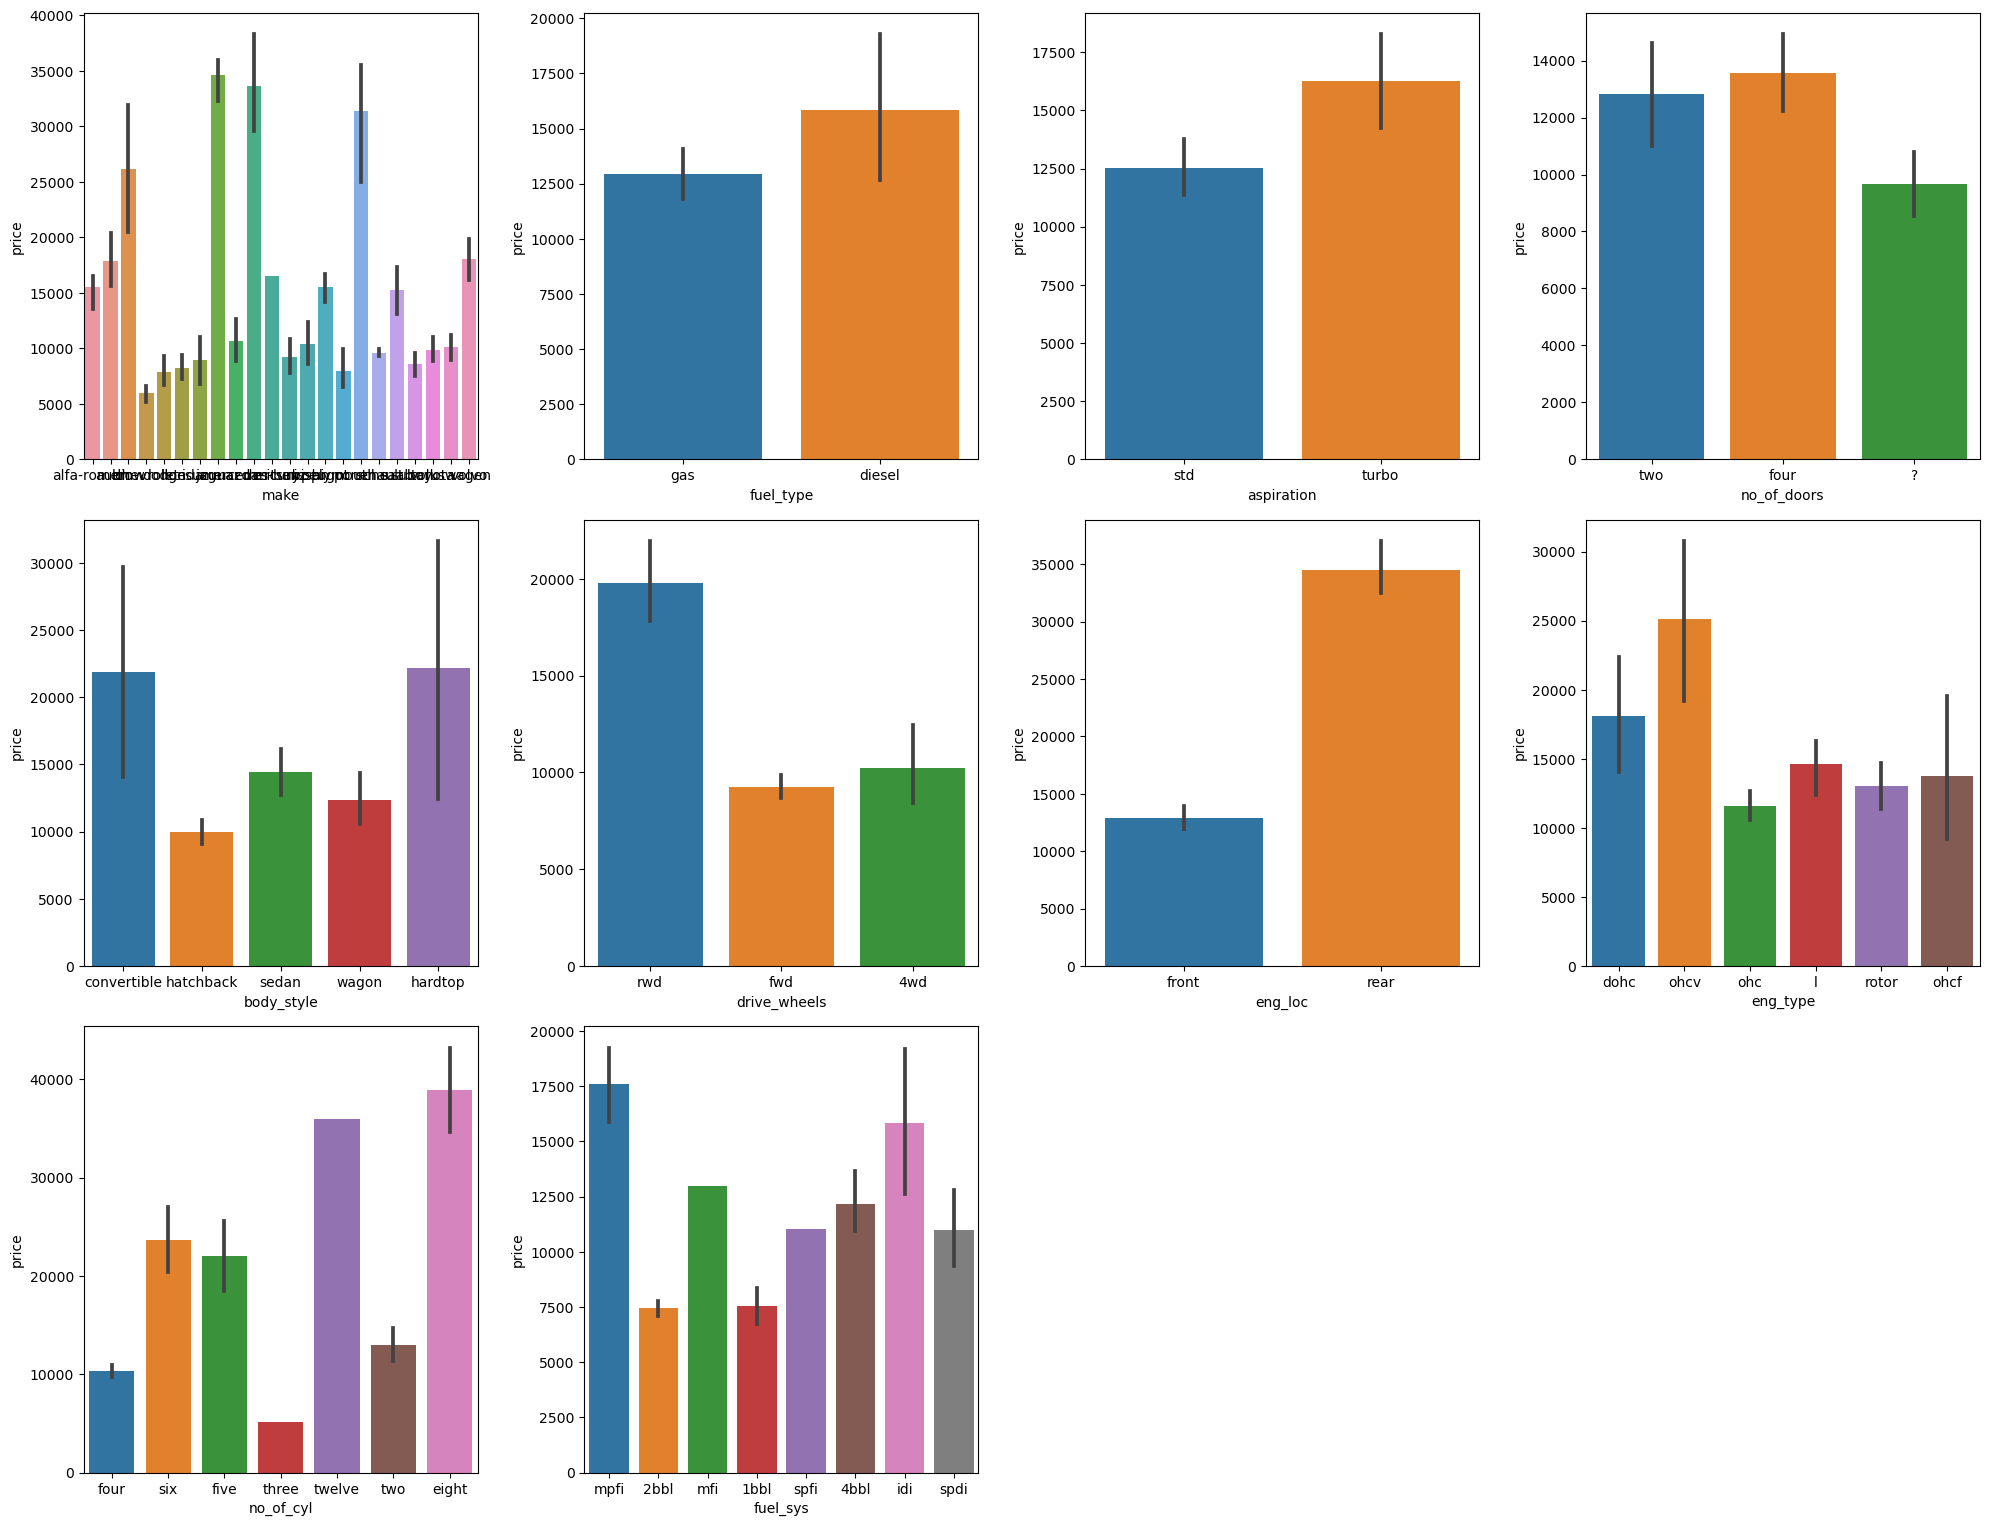

In [13]:
# we can creates a visualization exploring the relationship between categorical features in cat_data and the price in our DataFrame df


cat_data = df[['make','fuel_type','aspiration','no_of_doors','body_style','drive_wheels','eng_loc','eng_type','no_of_cyl','fuel_sys']]
num_data = df[['norm_losses','bore','stroke','horsepower','peak_rpm','symboling','wheel_base','length','width','height','curb_weight','eng_size','compr_ratio','city_mpg','highway_mpg']]

plt.figure(figsize=(20,20))
pltnum1=1

for i in cat_data:    
    if pltnum1<16:
        plt.subplot(4,4,pltnum1)
        sns.barplot(x=cat_data[i],y=df.price)
    pltnum1+=1
plt.tight_layout()
plt.show()

**Data Insights:<br>**
    • Price of Jaguar cars is the highest.<br>
    • The price of diesel engine cars is higher than gas engine cars.<br>
    • Turbo engined cars are pricey than the naturally aspirated cars.<br>
    • Cars with 4 doors are costlier than 2 door cars.<br>
    • Convertible and Hardtop type of cars have higher price than other types.<br>
    • Reverse wheel drive cars have higher price than forward or 4 wheel drive cars.<br>
    • Rear engine cars are costlier than front engine cars.<br>
    • OverHead Camp Valve (ohcv) engine have higher price.<br>
    • 8 cylinder engine cars have highest price.<br>
    • mpfi fuel system car has the highest price.

**Bivariate analysis of numerical data with respect to Target vaiable price**

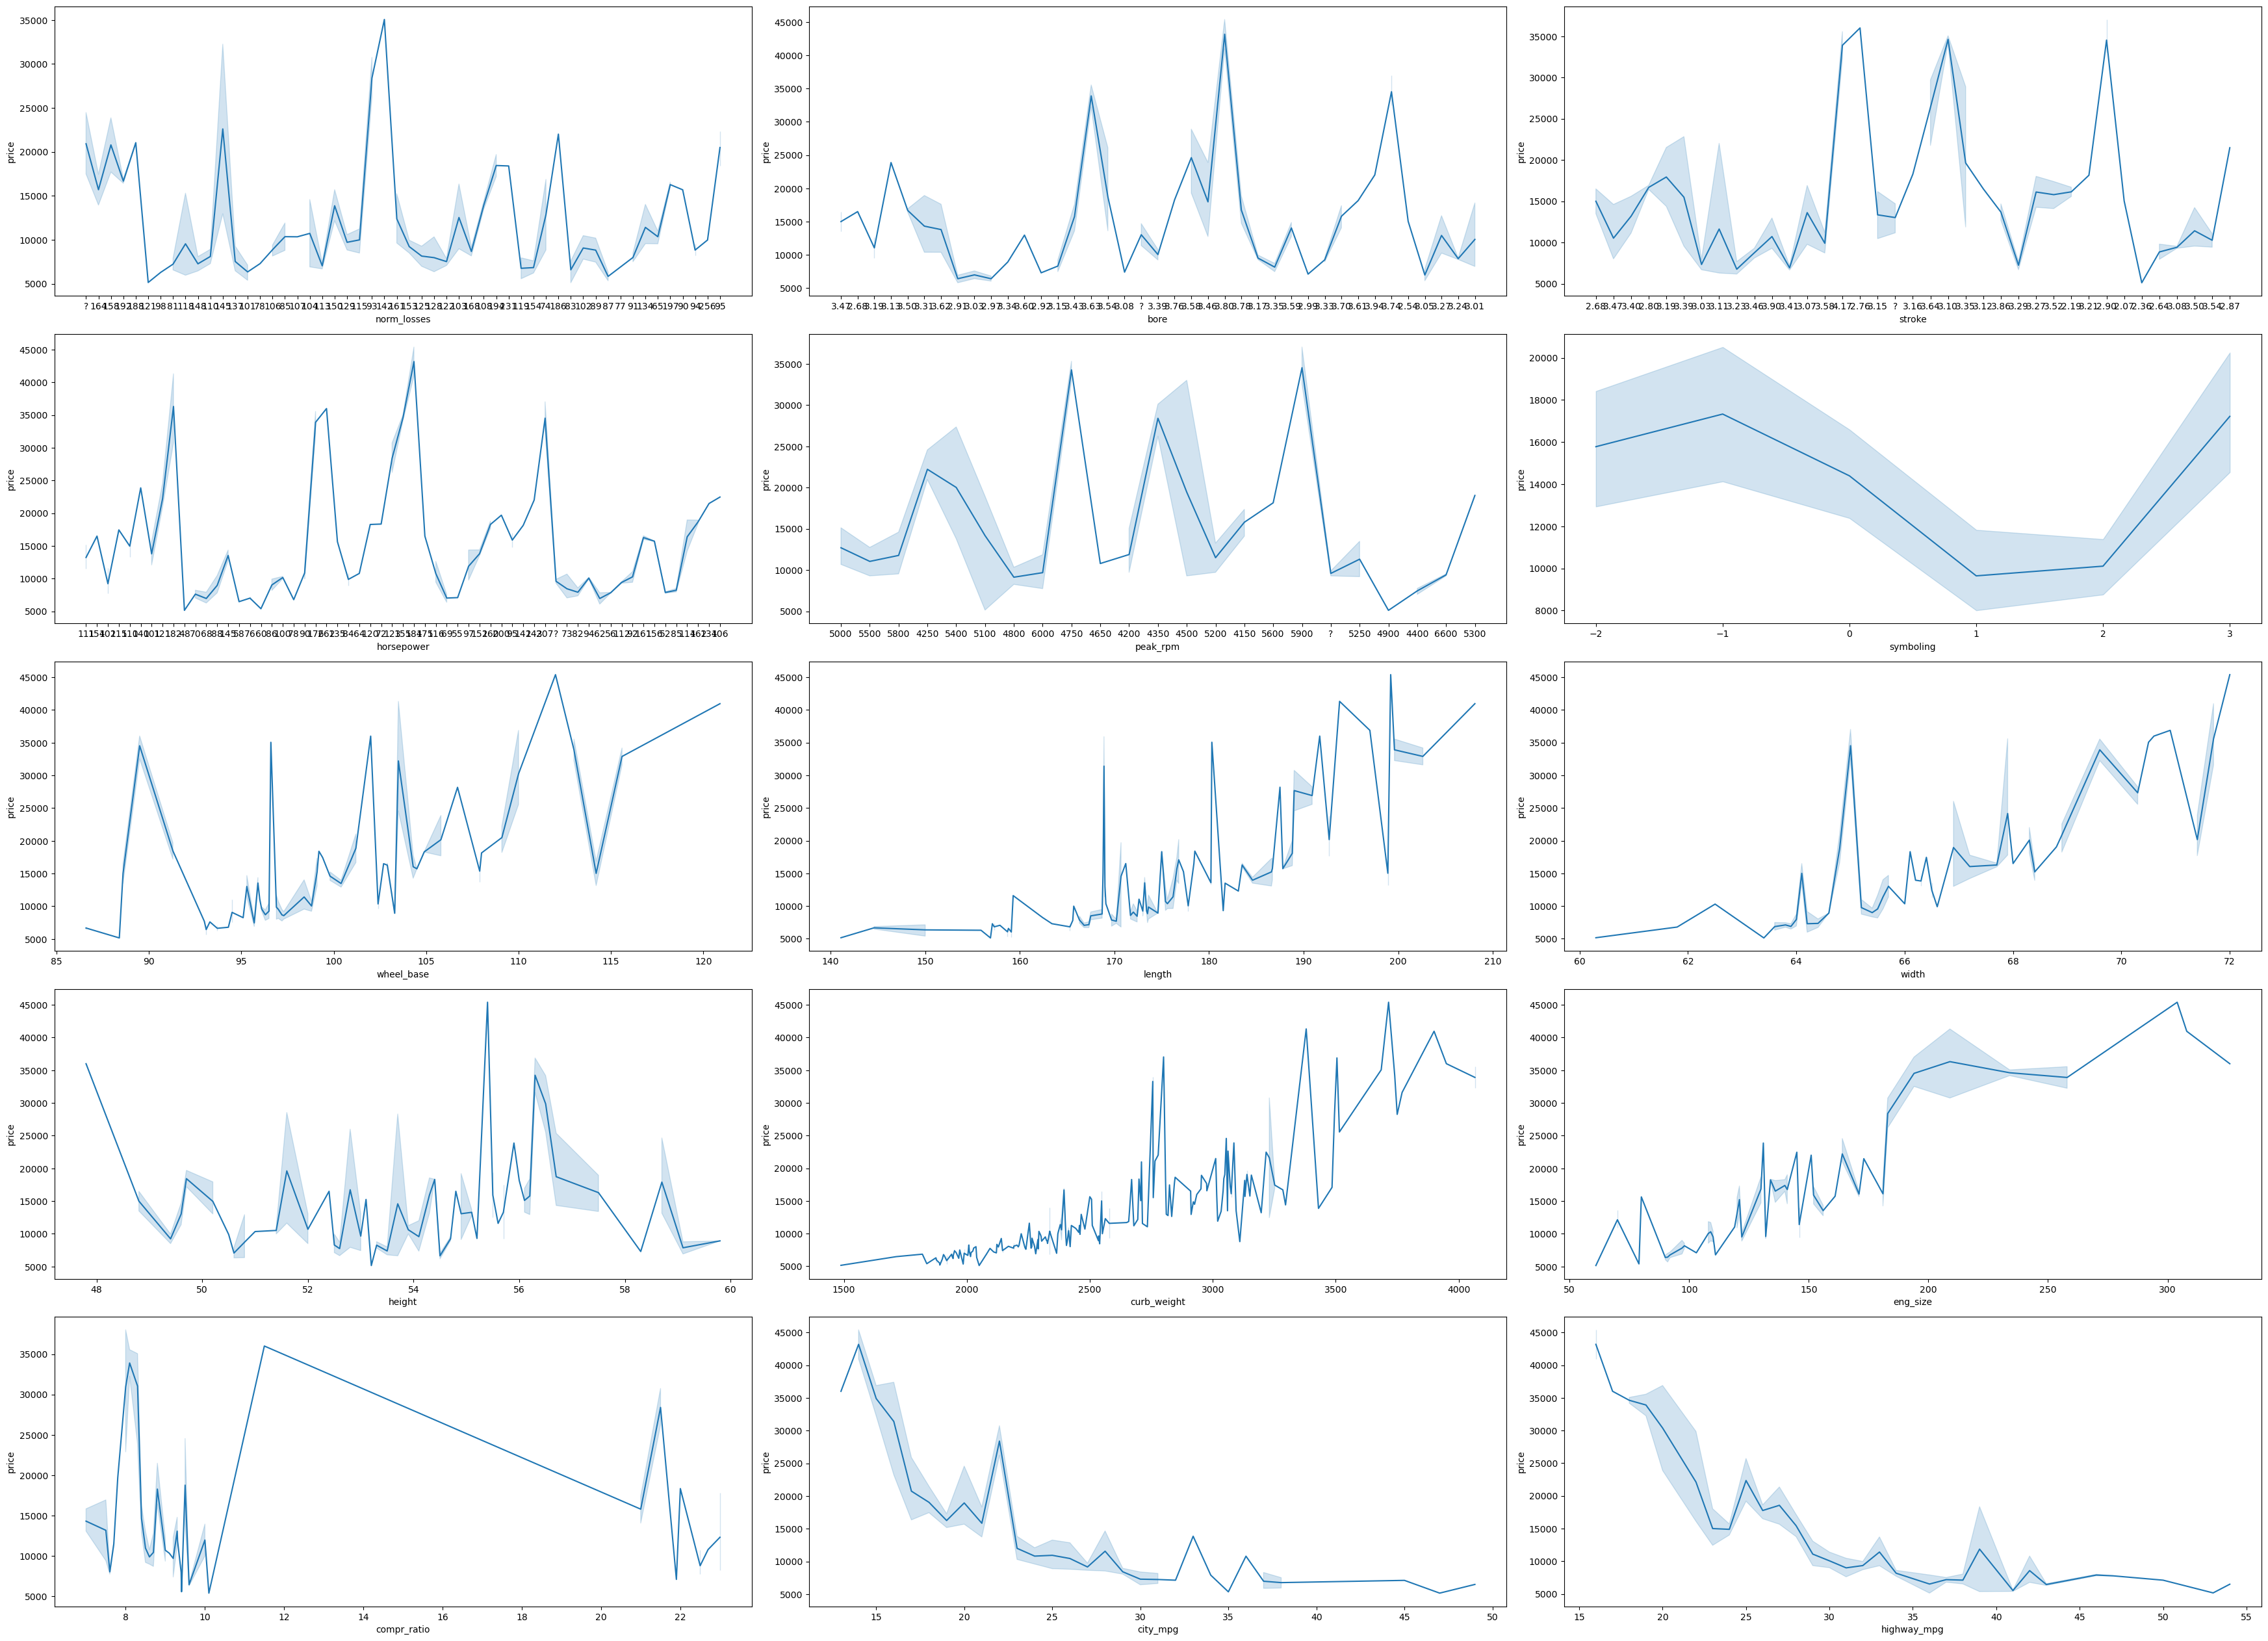

In [14]:
# Now we can creating a visualization for the numerical features in num_data and their relationship with price in our DataFrame df
plt.figure(figsize=(35,35))
pltnum2=1

for j in num_data:
    if pltnum2<=15:
        plt.subplot(7,3,pltnum2)
        sns.lineplot(x=num_data[j],y=df.price)
    pltnum2+=1
plt.tight_layout()
plt.show()

**Data Insights:<br>**
    • At an average normalized loss of 142, the price of cars is 35k.<br>
    • Cars with bore measuring 3.8units has the highest price.<br>
    • Cars with stroke length of 2.76units has the highest price.<br>
    • A horsepower of 184 is paid the highest price.<br>
    • Car with peak RPM of 5900 is the costliest.<br>
    • A car with symboling value of -1 has higher price than that with value of 3.<br>
    • Car with wheel base of 112 is paid highest.<br>
    • Car with length of 199.2, width of 72 and height of 55.4 is highly paid.<br>
    • Car with curb weight of 3715 is highly paid.<br>
    • Engine size of 304 has highest price.<br>
    • Compression ratio of 11.5 is paid more.<br>
    • A city mpg of 14 is sold at highest price.<br>
    • A highway mpg of 16 is sold at highest price.

# MULTIVARIATE ANALYSIS

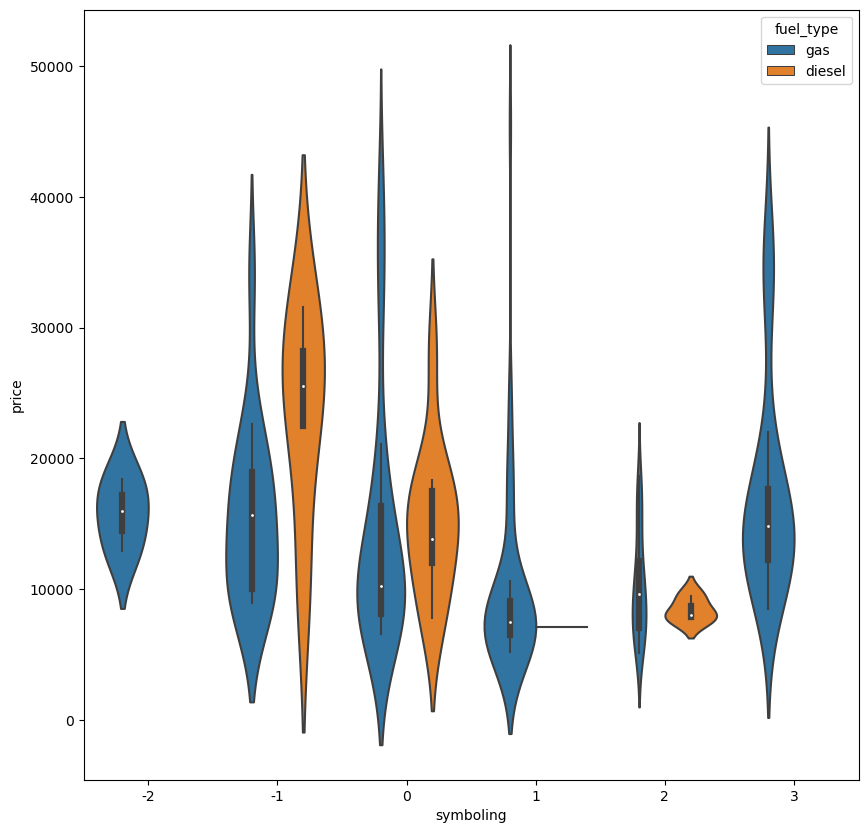

In [15]:
# creating  a violin plot to visualize the distribution of price across different values of the symboling feature, colored by the fuel_type of the car
plt.figure(figsize=(10,10))
sns.violinplot(x=df.symboling,y=df.price,hue=df.fuel_type)
plt.show()

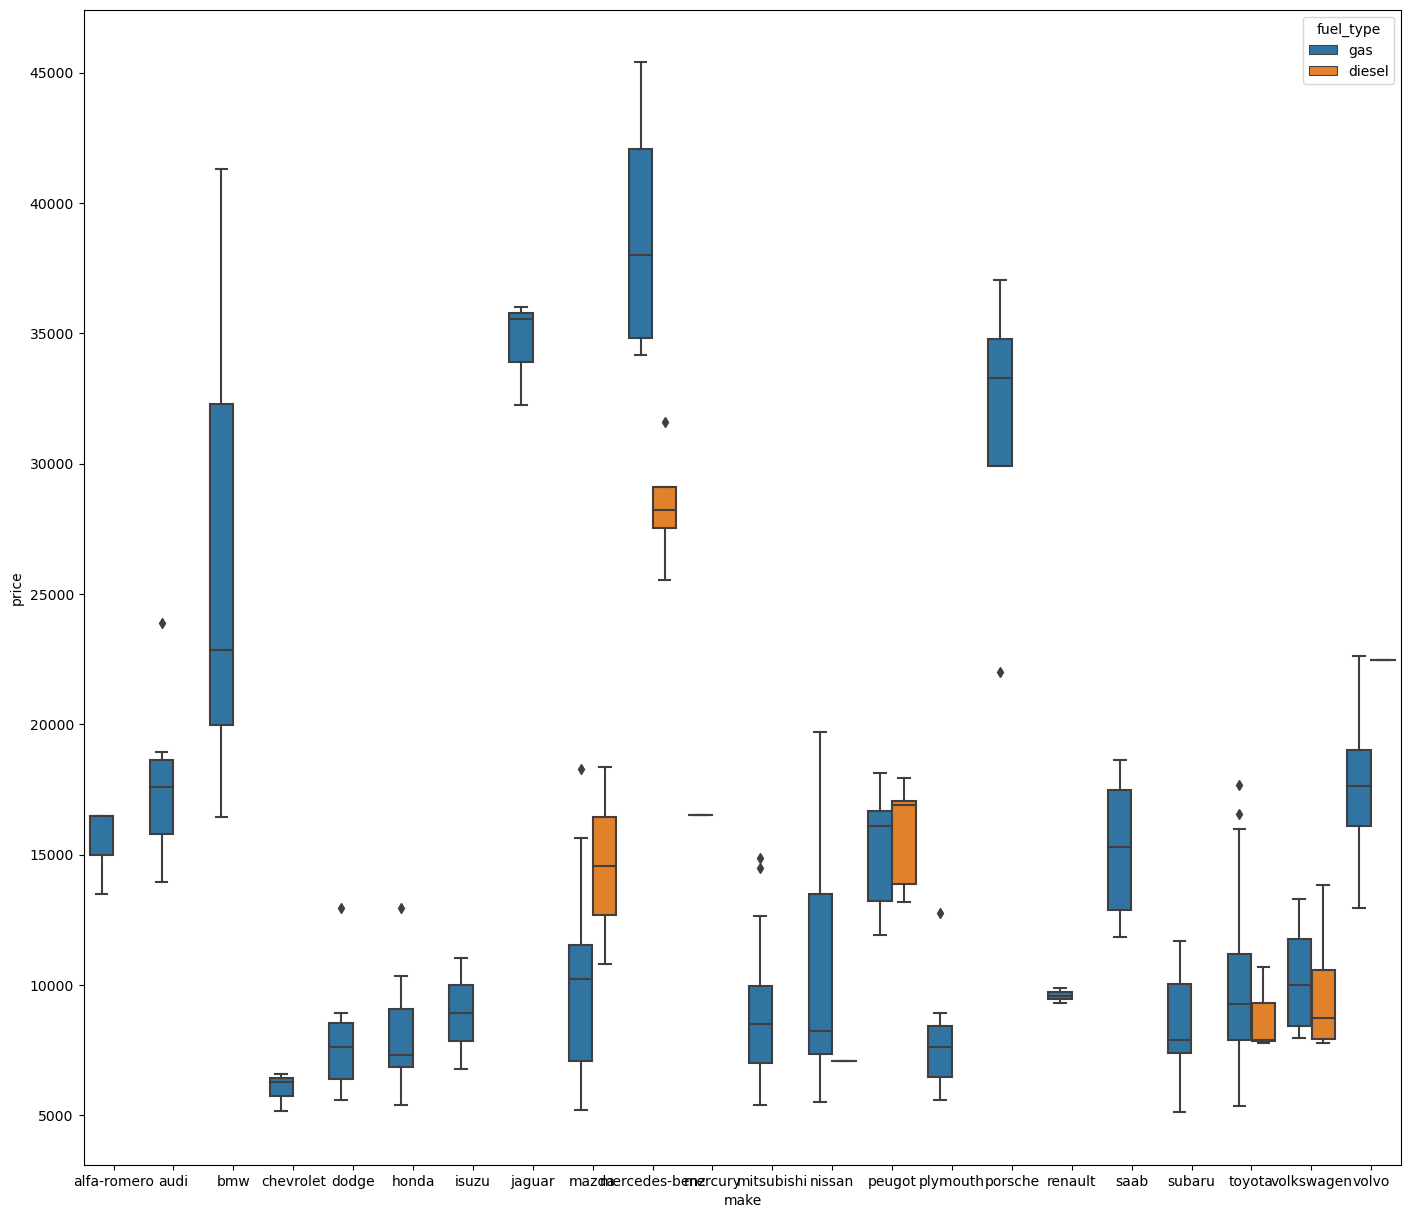

In [16]:
# creating a boxplot to analyze the distribution of price across different car makes (df.make), colored by the fuel type (df.fuel_type). 
plt.figure(figsize=(17,15))
sns.boxplot(x=df.make,y=df.price,hue=df.fuel_type)
plt.show()

**Mercedes-benz with gas fuel type has Highest price**

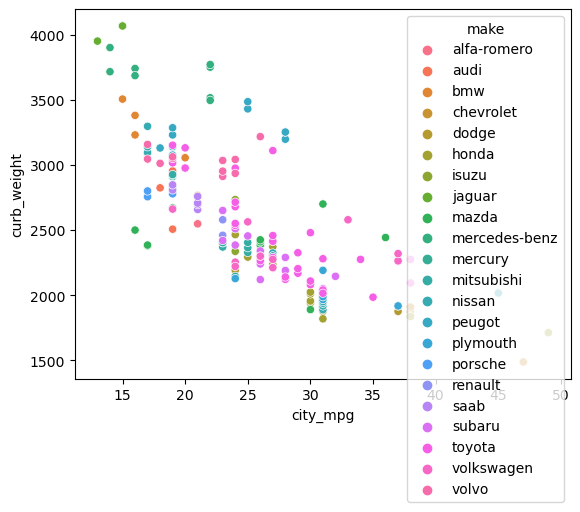

In [17]:
#  creates a scatter plot using seaborn to visualize the relationship between city_mpg & curb_weight
sns.scatterplot(x='city_mpg', y='curb_weight', data=df, hue='make')
plt.show()

**With increase in weight of vechle,city mpg decrease**

# DATA PREPROCESSING

**Checking for missing or Null values**

In [18]:
# Iterates through each column , Identifies columns with the data type 'object' & Prints the column name and its unique values.
for col in df:
    if df[col].dtype== 'object':
        print(f"Column and Value counts:\n",col ,df[col].unique())

Column and Value counts:
 norm_losses ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
Column and Value counts:
 make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Column and Value counts:
 fuel_type ['gas' 'diesel']
Column and Value counts:
 aspiration ['std' 'turbo']
Column and Value counts:
 no_of_doors ['two' 'four' '?']
Column and Value counts:
 body_style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Column and Value counts:
 drive_wheels ['rwd' 'fwd' '4wd']
Column and Value counts:
 eng_loc ['front' 'rear']
Column and Value counts:
 eng_type ['dohc' 'ohc

**There are no null values but there are missing values denoted by symbol'?' in columns**

-  **norm_losses**
-  **no_of_doors**
-  **bore**
- **stroke**
- **horsepower** 
- **peak_rpm** 

**we will be handling all these values by replacing them with mean or mode of those features accordingly.**

_**Norm_losses**_

In [19]:
df.loc[df.norm_losses=='?']

symboling norm_losses           make fuel_type aspiration no_of_doors  \
0            3           ?    alfa-romero       gas        std         two   
1            3           ?    alfa-romero       gas        std         two   
2            1           ?    alfa-romero       gas        std         two   
5            2           ?           audi       gas        std         two   
7            1           ?           audi       gas        std        four   
13           1           ?            bmw       gas        std        four   
14           0           ?            bmw       gas        std        four   
15           0           ?            bmw       gas        std         two   
16           0           ?            bmw       gas        std        four   
42           0           ?          isuzu       gas        std        four   
43           2           ?          isuzu       gas        std         two   
45           0           ?         jaguar       gas        std        four   
46           0           ?         jaguar       gas        std         two   
60           0           ?          mazda    diesel        std           ?   
63           0           ?          mazda    diesel        std        four   
68          -1           ?  mercedes-benz       gas        std        four   
70           0           ?  mercedes-benz       gas        std        four   
71           1           ?  mercedes-benz       gas        std         two   
72           1           ?        mercury       gas      turbo         two   
79           3           ?     mitsubishi       gas      turbo         two   
80           3           ?     mitsubishi       gas      turbo         two   
81           3           ?     mitsubishi       gas      turbo         two   
106          0           ?         peugot       gas        std        four   
107          0           ?         peugot    diesel      turbo        four   
110          0           ?         peugot       gas        std        four   
111          0           ?         peugot    diesel      turbo        four   
121          3           ?       plymouth       gas      turbo         two   
123          3           ?        porsche       gas        std         two   
124          3           ?        porsche       gas        std         two   
125          3           ?        porsche       gas        std         two   
126          0           ?        renault       gas        std        four   
127          2           ?        renault       gas        std         two   
177         -1           ?         toyota       gas        std        four   
185          3           ?     volkswagen       gas        std         two   
187          0           ?     volkswagen       gas        std        four   
188          0           ?     volkswagen    diesel      turbo        four   
189          0           ?     volkswagen       gas        std        four   

      body_style drive_wheels eng_loc  wheel_base  length  width  height  \
0    convertible          rwd   front        88.6   168.8   64.1    48.8   
1    convertible          rwd   front        88.6   168.8   64.1    48.8   
2      hatchback          rwd   front        94.5   171.2   65.5    52.4   
5          sedan          fwd   front        99.8   177.3   66.3    53.1   
7          wagon          fwd   front       105.8   192.7   71.4    55.7   
13         sedan          rwd   front       103.5   189.0   66.9    55.7   
14         sedan          rwd   front       103.5   189.0   66.9    55.7   
15         sedan          rwd   front       103.5   193.8   67.9    53.7   
16         sedan          rwd   front       110.0   197.0   70.9    56.3   
42         sedan          rwd   front        94.3   170.7   61.8    53.5   
43     hatchback          rwd   front        96.0   172.6   65.2    51.4   
45         sedan          rwd   front       113.0   199.6   69.6    52.8   
46         sedan          rwd   front       102.0   

115.0

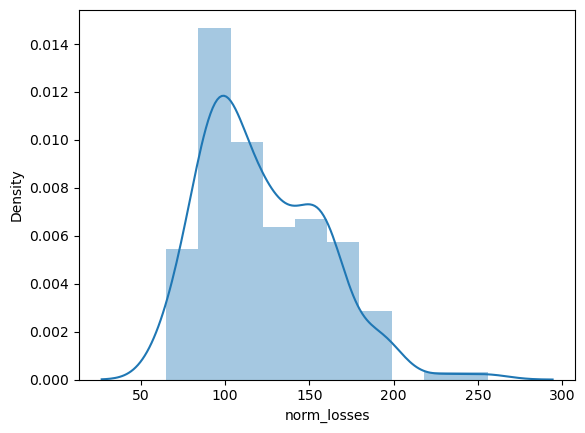

In [20]:
# we will find the mean/median of norm_losses without missing data

norm_data_miss = df.drop(df[df.norm_losses=='?'].index, axis=0) # Removes rows from the DataFrame df where the norm_losses column contains the value '?'.
norm_data_miss = norm_data_miss.norm_losses # Extracts only the norm_losses column from the cleaned DataFrame.
norm_data_miss = norm_data_miss.astype('float') #  Converts the extracted norm_losses data to floating-point numbers for numerical calculations.

sns.distplot(norm_data_miss) #  Creates a distribution plot of the norm_data_miss data 
norm_data_miss.median() # Calculates and prints the median value of the norm_data_miss data.

In [21]:
# Now we will replace the missing values of norm_losses by this median as the distribution is not normal

df.loc[df.norm_losses=='?', 'norm_losses'] = norm_data_miss.median()

In [22]:
df.loc[df.norm_losses=='?']

Empty DataFrame
Columns: [symboling, norm_losses, make, fuel_type, aspiration, no_of_doors, body_style, drive_wheels, eng_loc, wheel_base, length, width, height, curb_weight, eng_type, no_of_cyl, eng_size, fuel_sys, bore, stroke, compr_ratio, horsepower, peak_rpm, city_mpg, highway_mpg, price]
Index: []

**no_of_doors**

In [23]:
df.loc[df.no_of_doors=='?']

symboling norm_losses   make fuel_type aspiration no_of_doors body_style  \
26          1         148  dodge       gas      turbo           ?      sedan   
60          0       115.0  mazda    diesel        std           ?      sedan   

   drive_wheels eng_loc  wheel_base  length  width  height  curb_weight  \
26          fwd   front        93.7   157.3   63.8    50.6         2191   
60          fwd   front        98.8   177.8   66.5    55.5         2443   

   eng_type no_of_cyl  eng_size fuel_sys  bore stroke  compr_ratio horsepower  \
26      ohc      four        98     mpfi  3.03   3.39          7.6        102   
60      ohc      four       122      idi  3.39   3.39         22.7         64   

   peak_rpm  city_mpg  highway_mpg  price  
26     5500        24           30   8558  
60     4650        36           42  10795

In [24]:
df.no_of_doors.value_counts()

four    113
two      86
?         2
Name: no_of_doors, dtype: int64

In [25]:
# Replacing the missing values of no_of_doors with 'four' as its the frequently occuring value
df.loc[df.no_of_doors=='?','no_of_doors']='four'

In [26]:
df.loc[df.no_of_doors=='?']

Empty DataFrame
Columns: [symboling, norm_losses, make, fuel_type, aspiration, no_of_doors, body_style, drive_wheels, eng_loc, wheel_base, length, width, height, curb_weight, eng_type, no_of_cyl, eng_size, fuel_sys, bore, stroke, compr_ratio, horsepower, peak_rpm, city_mpg, highway_mpg, price]
Index: []

**bore**

In [27]:

df.loc[df.bore=='?']

symboling norm_losses   make fuel_type aspiration no_of_doors body_style  \
52          3         150  mazda       gas        std         two  hatchback   
53          3         150  mazda       gas        std         two  hatchback   
54          3         150  mazda       gas        std         two  hatchback   
55          3         150  mazda       gas        std         two  hatchback   

   drive_wheels eng_loc  wheel_base  length  width  height  curb_weight  \
52          rwd   front        95.3   169.0   65.7    49.6         2380   
53          rwd   front        95.3   169.0   65.7    49.6         2380   
54          rwd   front        95.3   169.0   65.7    49.6         2385   
55          rwd   front        95.3   169.0   65.7    49.6         2500   

   eng_type no_of_cyl  eng_size fuel_sys bore stroke  compr_ratio horsepower  \
52    rotor       two        70     4bbl    ?      ?          9.4        101   
53    rotor       two        70     4bbl    ?      ?          9.4        101   
54    rotor       two        70     4bbl    ?      ?          9.4        101   
55    rotor       two        80     mpfi    ?      ?          9.4        135   

   peak_rpm  city_mpg  highway_mpg  price  
52     6000        17           23  10945  
53     6000        17           23  11845  
54     6000        17           23  13645  
55     6000        16           23  15645

<Axes: xlabel='bore', ylabel='Density'>

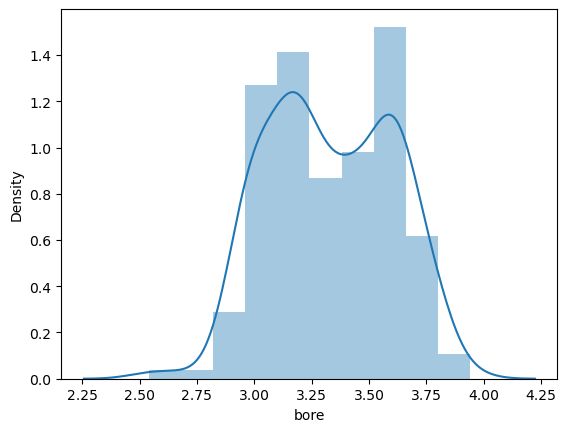

In [28]:
bore_data_wout_miss=df.drop(df[df.bore=='?'].index,axis=0)
bore_data_wout_miss = bore_data_wout_miss.bore
bore_data_wout_miss = bore_data_wout_miss.astype('float')

# Checking if the distribution of bore_data_wout_miss is normal or not
sns.distplot(bore_data_wout_miss)

In [29]:
# Replacing the missing values of bore with median of bore_data_wout_miss as it has not normal disribution
df.loc[df.bore=='?','bore']=bore_data_wout_miss.median()

In [30]:
df.loc[df.bore=='?']

Empty DataFrame
Columns: [symboling, norm_losses, make, fuel_type, aspiration, no_of_doors, body_style, drive_wheels, eng_loc, wheel_base, length, width, height, curb_weight, eng_type, no_of_cyl, eng_size, fuel_sys, bore, stroke, compr_ratio, horsepower, peak_rpm, city_mpg, highway_mpg, price]
Index: []

**stroke**

In [31]:
df.loc[df.stroke=='?']

symboling norm_losses   make fuel_type aspiration no_of_doors body_style  \
52          3         150  mazda       gas        std         two  hatchback   
53          3         150  mazda       gas        std         two  hatchback   
54          3         150  mazda       gas        std         two  hatchback   
55          3         150  mazda       gas        std         two  hatchback   

   drive_wheels eng_loc  wheel_base  length  width  height  curb_weight  \
52          rwd   front        95.3   169.0   65.7    49.6         2380   
53          rwd   front        95.3   169.0   65.7    49.6         2380   
54          rwd   front        95.3   169.0   65.7    49.6         2385   
55          rwd   front        95.3   169.0   65.7    49.6         2500   

   eng_type no_of_cyl  eng_size fuel_sys  bore stroke  compr_ratio horsepower  \
52    rotor       two        70     4bbl  3.31      ?          9.4        101   
53    rotor       two        70     4bbl  3.31      ?          9.4        101   
54    rotor       two        70     4bbl  3.31      ?          9.4        101   
55    rotor       two        80     mpfi  3.31      ?          9.4        135   

   peak_rpm  city_mpg  highway_mpg  price  
52     6000        17           23  10945  
53     6000        17           23  11845  
54     6000        17           23  13645  
55     6000        16           23  15645

<Axes: xlabel='stroke', ylabel='Density'>

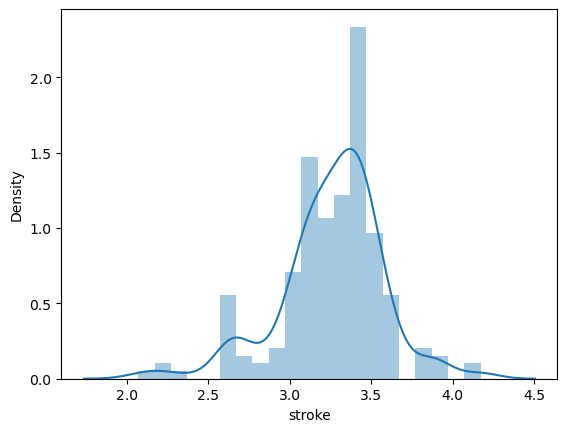

In [32]:
stroke_data_wout_miss = df.drop(df[df.stroke=='?'].index,axis=0)
stroke_data_wout_miss = stroke_data_wout_miss.stroke
stroke_data_wout_miss = stroke_data_wout_miss.astype('float')

# Checking if the distribution of stroke_data_wout_miss is normal or not
sns.distplot(stroke_data_wout_miss)

In [33]:
# Replacing the missing values of stroke with median of stroke_data_wout_miss as it has not normal distribution
df.loc[df.stroke=='?','stroke']=stroke_data_wout_miss.median()

In [34]:
df.loc[df.stroke=='?']

Empty DataFrame
Columns: [symboling, norm_losses, make, fuel_type, aspiration, no_of_doors, body_style, drive_wheels, eng_loc, wheel_base, length, width, height, curb_weight, eng_type, no_of_cyl, eng_size, fuel_sys, bore, stroke, compr_ratio, horsepower, peak_rpm, city_mpg, highway_mpg, price]
Index: []

**horsepower**

In [35]:
df.loc[df.horsepower=='?']

symboling norm_losses     make fuel_type aspiration no_of_doors  \
126          0       115.0  renault       gas        std        four   
127          2       115.0  renault       gas        std         two   

    body_style drive_wheels eng_loc  wheel_base  length  width  height  \
126      wagon          fwd   front        96.1   181.5   66.5    55.2   
127  hatchback          fwd   front        96.1   176.8   66.6    50.5   

     curb_weight eng_type no_of_cyl  eng_size fuel_sys  bore stroke  \
126         2579      ohc      four       132     mpfi  3.46   3.90   
127         2460      ohc      four       132     mpfi  3.46   3.90   

     compr_ratio horsepower peak_rpm  city_mpg  highway_mpg  price  
126          8.7          ?        ?        23           31   9295  
127          8.7          ?        ?        23           31   9895

<Axes: xlabel='horsepower', ylabel='Density'>

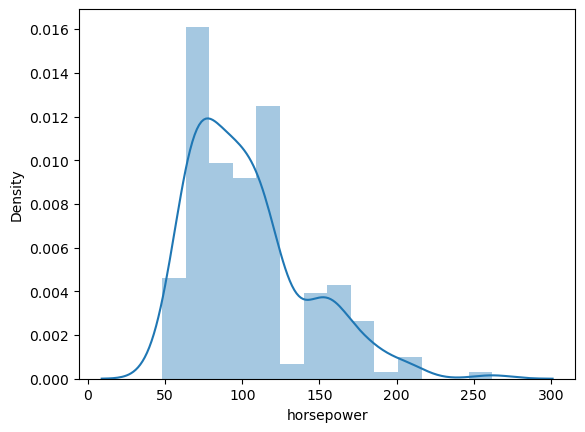

In [36]:
hp_data_wout_miss = df.drop(df[df.horsepower=='?'].index,axis=0)
hp_data_wout_miss = hp_data_wout_miss.horsepower
hp_data_wout_miss = hp_data_wout_miss.astype('float')

# Checking if the distribution of hp_data_wout_miss is normal or not
sns.distplot(hp_data_wout_miss)

In [37]:
# Replacing the missing values of horsepower with median of hp_data_wout_miss as it has not normal distribution
df.loc[df.horsepower=='?','horsepower']=hp_data_wout_miss.median()

In [38]:
df.loc[df.horsepower=='?']

Empty DataFrame
Columns: [symboling, norm_losses, make, fuel_type, aspiration, no_of_doors, body_style, drive_wheels, eng_loc, wheel_base, length, width, height, curb_weight, eng_type, no_of_cyl, eng_size, fuel_sys, bore, stroke, compr_ratio, horsepower, peak_rpm, city_mpg, highway_mpg, price]
Index: []

**peak_rpm**

In [39]:
df.loc[df.peak_rpm=='?']

symboling norm_losses     make fuel_type aspiration no_of_doors  \
126          0       115.0  renault       gas        std        four   
127          2       115.0  renault       gas        std         two   

    body_style drive_wheels eng_loc  wheel_base  length  width  height  \
126      wagon          fwd   front        96.1   181.5   66.5    55.2   
127  hatchback          fwd   front        96.1   176.8   66.6    50.5   

     curb_weight eng_type no_of_cyl  eng_size fuel_sys  bore stroke  \
126         2579      ohc      four       132     mpfi  3.46   3.90   
127         2460      ohc      four       132     mpfi  3.46   3.90   

     compr_ratio horsepower peak_rpm  city_mpg  highway_mpg  price  
126          8.7       95.0        ?        23           31   9295  
127          8.7       95.0        ?        23           31   9895

<Axes: xlabel='peak_rpm', ylabel='Density'>

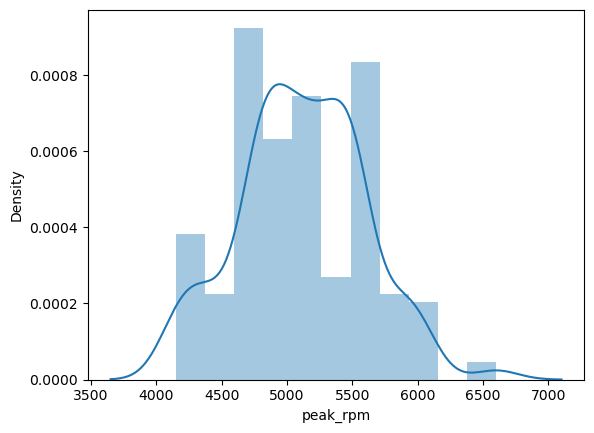

In [40]:
rpm_data_wout_miss = df.drop(df[df.peak_rpm=='?'].index,axis=0)
rpm_data_wout_miss = rpm_data_wout_miss.peak_rpm
rpm_data_wout_miss = rpm_data_wout_miss.astype('float')

# Checking if the distribution of rpm_data_wout_miss is normal or not
sns.distplot(rpm_data_wout_miss)

In [41]:
# Replacing the missing values of peak_rpm with median of rpm_data_wout_miss as it has not normal distribution
df.loc[df.peak_rpm=='?','peak_rpm']=rpm_data_wout_miss.median()

In [42]:
df.loc[df.peak_rpm=='?']

Empty DataFrame
Columns: [symboling, norm_losses, make, fuel_type, aspiration, no_of_doors, body_style, drive_wheels, eng_loc, wheel_base, length, width, height, curb_weight, eng_type, no_of_cyl, eng_size, fuel_sys, bore, stroke, compr_ratio, horsepower, peak_rpm, city_mpg, highway_mpg, price]
Index: []

In [43]:
df

symboling norm_losses           make fuel_type aspiration no_of_doors  \
0            3       115.0    alfa-romero       gas        std         two   
1            3       115.0    alfa-romero       gas        std         two   
2            1       115.0    alfa-romero       gas        std         two   
3            2         164           audi       gas        std        four   
4            2         164           audi       gas        std        four   
5            2       115.0           audi       gas        std         two   
6            1         158           audi       gas        std        four   
7            1       115.0           audi       gas        std        four   
8            1         158           audi       gas      turbo        four   
9            2         192            bmw       gas        std         two   
10           0         192            bmw       gas        std        four   
11           0         188            bmw       gas        std         two   
12           0         188            bmw       gas        std        four   
13           1       115.0            bmw       gas        std        four   
14           0       115.0            bmw       gas        std        four   
15           0       115.0            bmw       gas        std         two   
16           0       115.0            bmw       gas        std        four   
17           2         121      chevrolet       gas        std         two   
18           1          98      chevrolet       gas        std         two   
19           0          81      chevrolet       gas        std        four   
20           1         118          dodge       gas        std         two   
21           1         118          dodge       gas        std         two   
22           1         118          dodge       gas      turbo         two   
23           1         148          dodge       gas        std        four   
24           1         148          dodge       gas        std        four   
25           1         148          dodge       gas        std        four   
26           1         148          dodge       gas      turbo        four   
27          -1         110          dodge       gas        std        four   
28           3         145          dodge       gas      turbo         two   
29           2         137          honda       gas        std         two   
30           2         137          honda       gas        std         two   
31           1         101          honda       gas        std         two   
32           1         101          honda       gas        std         two   
33           1         101          honda       gas        std         two   
34           0         110          honda       gas        std        four   
35           0          78          honda       gas        std        four   
36           0         106          honda       gas        std         two   
37           0         106          honda       gas        std         two   
38           0          85          honda       gas        std        four   
39           0          85          honda       gas        std        four   
40           0          85          honda       gas        std        four   
41           1         107          honda       gas        std         two   
42           0       115.0          isuzu       gas        std        four   
43           2       115.0          isuzu       gas        std         two   
44           0         145         jaguar       gas        std        four   
45           0       115.0         jaguar       gas        std        four   
46           0       115.0         jaguar       gas        std         two   
47           1         104          mazda       gas        std         two   
48           1         104          mazda       gas        std         two   
49           1         104          mazda       gas        std         two   
50           1         113 

In [44]:
# Iterates through each column , Identifies columns with the data type 'object' & Prints the column name and its unique values.
for col in df:
    if df[col].dtype== 'object':
        print(col, df[col].unique())

norm_losses [115.0 '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145'
 '137' '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93'
 '142' '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119'
 '154' '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90'
 '94' '256' '95']
make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel_type ['gas' 'diesel']
aspiration ['std' 'turbo']
no_of_doors ['two' 'four']
body_style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive_wheels ['rwd' 'fwd' '4wd']
eng_loc ['front' 'rear']
eng_type ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
no_of_cyl ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuel_sys ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
bore ['3.47' '2.68' '3.19' '3.13' '3.50' '3.31' '3.62' '2.91' '3.03' '2.97'
 '3

In [45]:
# Also changing the datatype of these features to float
df.norm_losses = df.norm_losses.astype('float')
df.bore = df.bore.astype('float')
df.stroke = df.stroke.astype('float')
df.horsepower = df.horsepower.astype('int')
df.peak_rpm = df.peak_rpm.astype('float')

**All missing values are successfully handled**

## Converting categorical data to numerical data

In [46]:
for col in df:
    if df[col].dtype == 'object':
        print(f"Column and Value counts:\n",col ,df[col].unique())

Column and Value counts:
 make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Column and Value counts:
 fuel_type ['gas' 'diesel']
Column and Value counts:
 aspiration ['std' 'turbo']
Column and Value counts:
 no_of_doors ['two' 'four']
Column and Value counts:
 body_style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Column and Value counts:
 drive_wheels ['rwd' 'fwd' '4wd']
Column and Value counts:
 eng_loc ['front' 'rear']
Column and Value counts:
 eng_type ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
Column and Value counts:
 no_of_cyl ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Column and Value counts:
 fuel_sys ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [47]:
df

symboling  norm_losses           make fuel_type aspiration no_of_doors  \
0            3        115.0    alfa-romero       gas        std         two   
1            3        115.0    alfa-romero       gas        std         two   
2            1        115.0    alfa-romero       gas        std         two   
3            2        164.0           audi       gas        std        four   
4            2        164.0           audi       gas        std        four   
5            2        115.0           audi       gas        std         two   
6            1        158.0           audi       gas        std        four   
7            1        115.0           audi       gas        std        four   
8            1        158.0           audi       gas      turbo        four   
9            2        192.0            bmw       gas        std         two   
10           0        192.0            bmw       gas        std        four   
11           0        188.0            bmw       gas        std         two   
12           0        188.0            bmw       gas        std        four   
13           1        115.0            bmw       gas        std        four   
14           0        115.0            bmw       gas        std        four   
15           0        115.0            bmw       gas        std         two   
16           0        115.0            bmw       gas        std        four   
17           2        121.0      chevrolet       gas        std         two   
18           1         98.0      chevrolet       gas        std         two   
19           0         81.0      chevrolet       gas        std        four   
20           1        118.0          dodge       gas        std         two   
21           1        118.0          dodge       gas        std         two   
22           1        118.0          dodge       gas      turbo         two   
23           1        148.0          dodge       gas        std        four   
24           1        148.0          dodge       gas        std        four   
25           1        148.0          dodge       gas        std        four   
26           1        148.0          dodge       gas      turbo        four   
27          -1        110.0          dodge       gas        std        four   
28           3        145.0          dodge       gas      turbo         two   
29           2        137.0          honda       gas        std         two   
30           2        137.0          honda       gas        std         two   
31           1        101.0          honda       gas        std         two   
32           1        101.0          honda       gas        std         two   
33           1        101.0          honda       gas        std         two   
34           0        110.0          honda       gas        std        four   
35           0         78.0          honda       gas        std        four   
36           0        106.0          honda       gas        std         two   
37           0        106.0          honda       gas        std         two   
38           0         85.0          honda       gas        std        four   
39           0         85.0          honda       gas        std        four   
40           0         85.0          honda       gas        std        four   
41           1        107.0          honda       gas        std         two   
42           0        115.0          isuzu       gas        std        four   
43           2        115.0          isuzu       gas        std         two   
44           0        145.0         jaguar       gas        std        four   
45           0        115.0         jaguar       gas        std        four   
46           0        115.0         jaguar       gas        std         two   
47           1        104.0          mazda       gas        std         two   
48           1        104.0          mazda       gas        std         two   
49           1        104.0          mazda       gas   

### Using Label Encoder

In [48]:

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df.make = lb.fit_transform(df.make)
df.fuel_type = lb.fit_transform(df.fuel_type) #gas=1, diesel=0
df.aspiration = lb.fit_transform(df.aspiration) #std=0, turbo=1
df.body_style = lb.fit_transform(df.body_style) #convertible=0, wagon=1, hatchback=2, sedan=3
df.drive_wheels = lb.fit_transform(df.drive_wheels) #4wd=0, rwd=2, fwd=1
df.eng_loc = lb.fit_transform(df.eng_loc) #front=0, rear=1
df.eng_type = lb.fit_transform(df.eng_type) #dohc=0, ohcv=4, ohc=2, l=1, rotor=5, ohcf=3
df.fuel_sys = lb.fit_transform(df.fuel_sys) #mpfi=5, idi=3, 1bbl=0, 2bbl=1, 4bbl=2, mfi=4, spfi=7, spdi=6

In [49]:
# Using map() to map the labels
df.no_of_doors = df.no_of_doors.map({'two':2,'four':4})
df.no_of_cyl = df.no_of_cyl.map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

In [50]:
df

symboling  norm_losses  make  fuel_type  aspiration  no_of_doors  \
0            3        115.0     0          1           0            2   
1            3        115.0     0          1           0            2   
2            1        115.0     0          1           0            2   
3            2        164.0     1          1           0            4   
4            2        164.0     1          1           0            4   
5            2        115.0     1          1           0            2   
6            1        158.0     1          1           0            4   
7            1        115.0     1          1           0            4   
8            1        158.0     1          1           1            4   
9            2        192.0     2          1           0            2   
10           0        192.0     2          1           0            4   
11           0        188.0     2          1           0            2   
12           0        188.0     2          1           0            4   
13           1        115.0     2          1           0            4   
14           0        115.0     2          1           0            4   
15           0        115.0     2          1           0            2   
16           0        115.0     2          1           0            4   
17           2        121.0     3          1           0            2   
18           1         98.0     3          1           0            2   
19           0         81.0     3          1           0            4   
20           1        118.0     4          1           0            2   
21           1        118.0     4          1           0            2   
22           1        118.0     4          1           1            2   
23           1        148.0     4          1           0            4   
24           1        148.0     4          1           0            4   
25           1        148.0     4          1           0            4   
26           1        148.0     4          1           1            4   
27          -1        110.0     4          1           0            4   
28           3        145.0     4          1           1            2   
29           2        137.0     5          1           0            2   
30           2        137.0     5          1           0            2   
31           1        101.0     5          1           0            2   
32           1        101.0     5          1           0            2   
33           1        101.0     5          1           0            2   
34           0        110.0     5          1           0            4   
35           0         78.0     5          1           0            4   
36           0        106.0     5          1           0            2   
37           0        106.0     5          1           0            2   
38           0         85.0     5          1           0            4   
39           0         85.0     5          1           0            4   
40           0         85.0     5          1           0            4   
41           1        107.0     5          1           0            2   
42           0        115.0     6          1           0            4   
43           2        115.0     6          1           0            2   
44           0        145.0     7          1           0            4   
45           0        115.0     7          1           0            4   
46           0        115.0     7          1           0            2   
47           1        104.0     8          1           0            2   
48           1        104.0     8          1           0            2   
49           1        104.0     8          1           0            2   
50           1        113.0     8          1           0            4   
51           1        113.0     8          1           0            4   
52           3        150.0     8          1           0            2   
53           3        150.0     8          1           0       

**All categorical features are now successfully converted to numerical**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     201 non-null    int64  
 1   norm_losses   201 non-null    float64
 2   make          201 non-null    int32  
 3   fuel_type     201 non-null    int32  
 4   aspiration    201 non-null    int32  
 5   no_of_doors   201 non-null    int64  
 6   body_style    201 non-null    int32  
 7   drive_wheels  201 non-null    int32  
 8   eng_loc       201 non-null    int32  
 9   wheel_base    201 non-null    float64
 10  length        201 non-null    float64
 11  width         201 non-null    float64
 12  height        201 non-null    float64
 13  curb_weight   201 non-null    int64  
 14  eng_type      201 non-null    int32  
 15  no_of_cyl     201 non-null    int64  
 16  eng_size      201 non-null    int64  
 17  fuel_sys      201 non-null    int32  
 18  bore          201 non-null    

### Handling Outliers

(1, 3, 4, 6, 8, 9, 10, 11, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24)

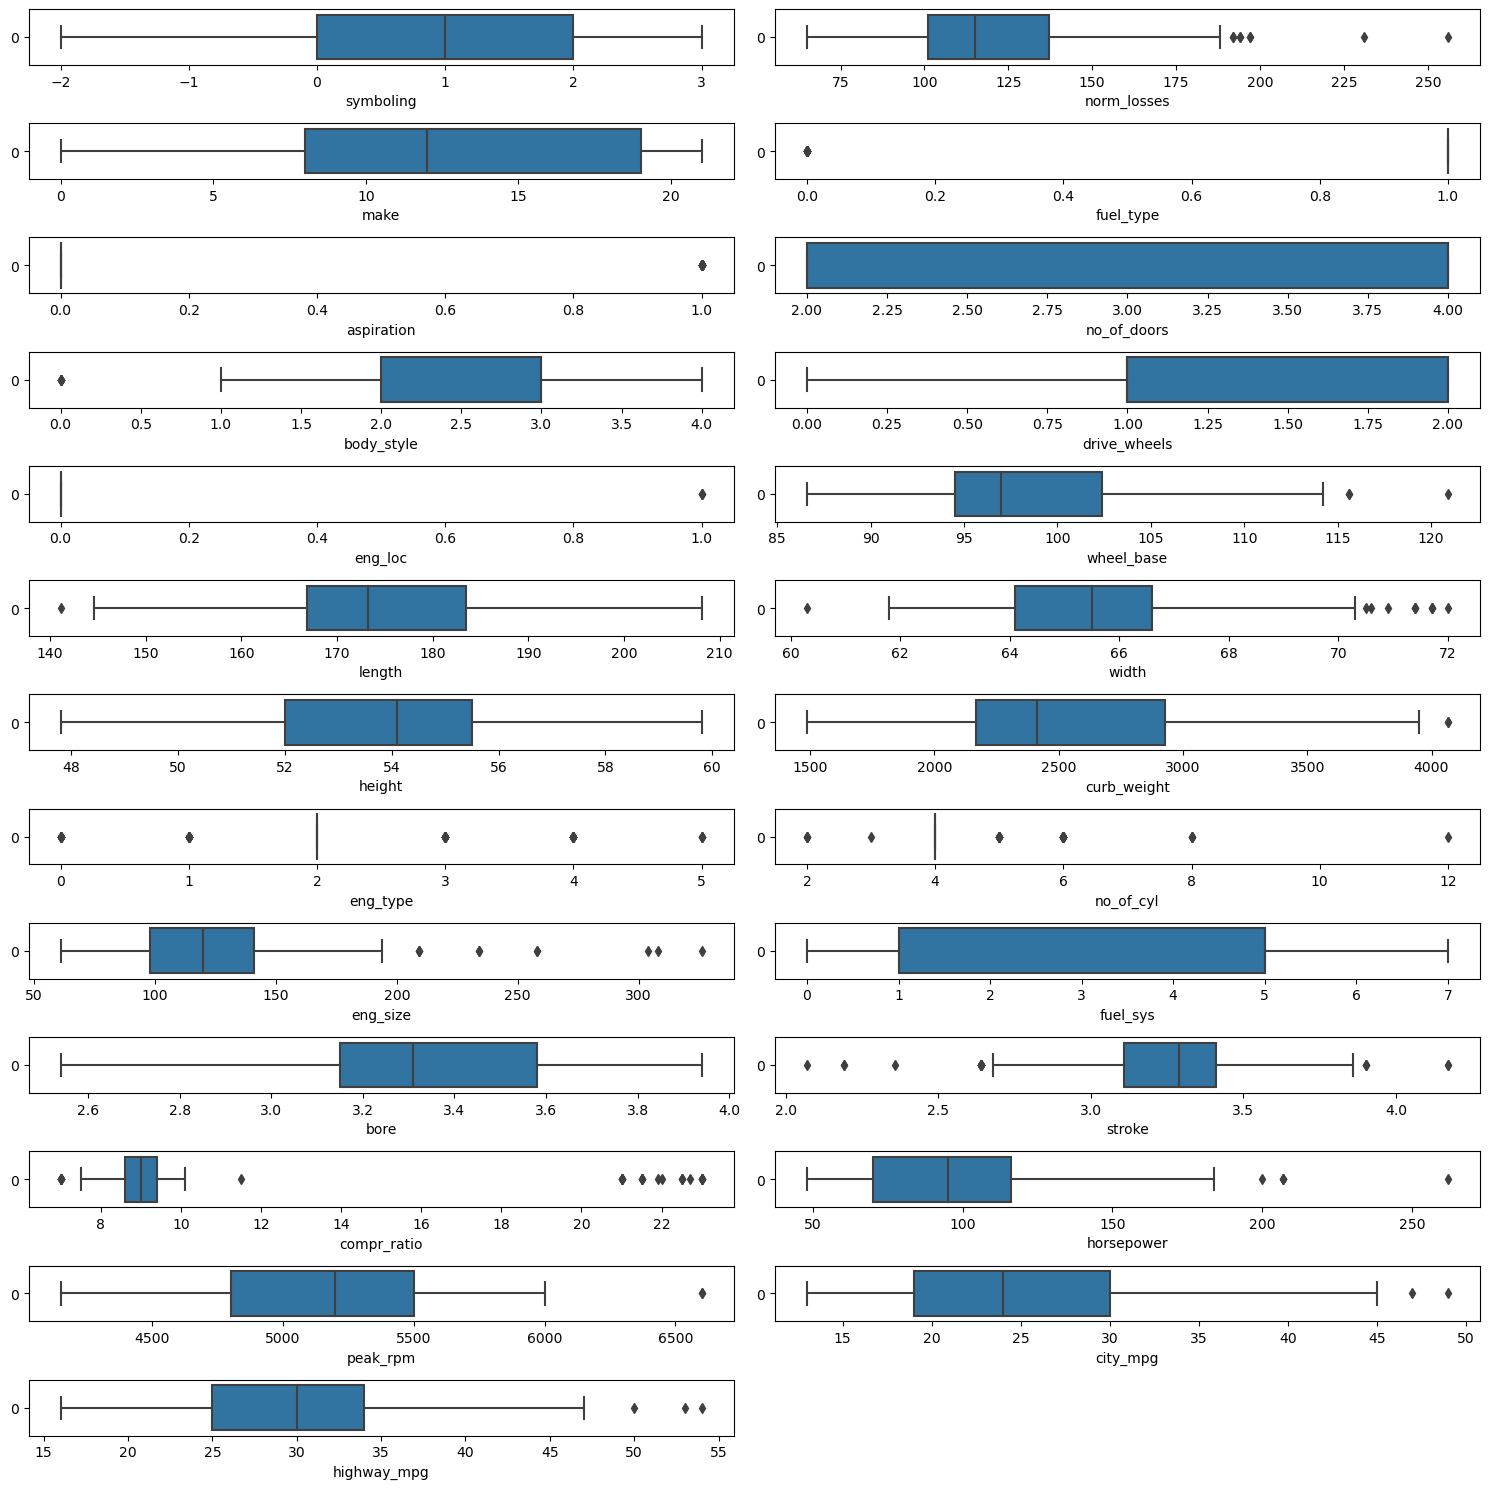

In [52]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1
for columns in df:
    if plotnumber<26:
        ax=plt.subplot(13,2,plotnumber)
        sns.boxplot(df[columns],orient='h')
        plt.xlabel(columns,fontsize=10)
       
    plotnumber+=1
plt.tight_layout()

1,3,4,6,8,9,10,11,13,14,15,16,19,20,21,22,23,24

**We have Outliers in:**

- **norm_losses**
- **fuel_type**
- **aspiration**
- **body_style**
- **eng_loc**
- **wheel_base**
- **length**
- **width**
- **curb_weight**
- **eng_type**
- **no_ofcyl**
- **eng_size**
- **stroke**
- **compr_ratio**
- **horsepower**
- **peak_rpm**
- **city_mpg**
- **highway_mpg**


**norm_losses**

In [53]:

from scipy import stats

IQR1 = stats.iqr(df.norm_losses)
Q11 = df.norm_losses.quantile(0.25)
Q31 = df.norm_losses.quantile(0.75)

max1 = Q31+1.5*IQR1
min1 = Q11-1.5*IQR1
print(len(df.loc[df.norm_losses>max1]))
print(len(df.loc[df.norm_losses<min1]))

8
0


In [54]:
8/201*100

3.9800995024875623

In [55]:
df.loc[df.norm_losses>max1,'norm_losses']=df.norm_losses.median()

In [56]:
len(df.loc[df.norm_losses>max1])

0

**fuel_type**

In [57]:

IQR2 = stats.iqr(df.fuel_type)
Q12 = df.fuel_type.quantile(0.25)
Q32 = df.fuel_type.quantile(0.75)

max2 = Q32+1.5*IQR2
min2 = Q12-1.5*IQR2
print(len(df.loc[df.fuel_type>max2]))
print(len(df.loc[df.fuel_type<min2]))

0
20


In [58]:
20/201*100

9.950248756218906

**As the outlier count is greater than 5%, we will not be handling them for fuel_type**

**aspiration**

In [59]:

IQR3 = stats.iqr(df.aspiration)
Q13 = df.aspiration.quantile(0.25)
Q33 = df.aspiration.quantile(0.75)

max3 = Q33+1.5*IQR3
min3 = Q13-1.5*IQR3
print(len(df.loc[df.aspiration>max3]))
print(len(df.loc[df.aspiration<min3]))

36
0


In [60]:
36/201*100

17.91044776119403

**As the outlier count is greater than 5%, we will not be handling them for aspiration**

**body_style**

In [61]:

IQR4 = stats.iqr(df.body_style)
Q14 = df.body_style.quantile(0.25)
Q34 = df.body_style.quantile(0.75)

max4 = Q34+1.5*IQR4
min4 = Q14-1.5*IQR4
print(len(df.loc[df.body_style>max4]))
print(len(df.loc[df.body_style<min4]))

0
6


In [62]:
6/201*100

2.9850746268656714

In [63]:
print(df.body_style.value_counts())
# Replacing outliers with mode(3) of body_style as its a discrete feature
df.loc[df.body_style<min4,'body_style']=3

3    94
2    68
4    25
1     8
0     6
Name: body_style, dtype: int64


In [64]:
print(len(df.loc[df.body_style<min4]))

0


**eng_loc**

In [65]:

IQR5 = stats.iqr(df.eng_loc)
Q15 = df.eng_loc.quantile(0.25)
Q35 = df.eng_loc.quantile(0.75)

max5 = Q35+1.5*IQR5
min5 = Q15-1.5*IQR5
print(len(df.loc[df.eng_loc>max5]))
print(len(df.loc[df.eng_loc<min5]))

3
0


In [66]:
3/201*100

1.4925373134328357

In [67]:
print(df.eng_loc.value_counts())
# Replacing outliers with mode(0) of eng_loc as its a discrete feature
df.loc[df.eng_loc>max5,'eng_loc']=0

0    198
1      3
Name: eng_loc, dtype: int64


In [68]:
print(len(df.loc[df.eng_loc>max5]))

0


**wheel_base**

In [69]:

IQR6 = stats.iqr(df.wheel_base)
Q16 = df.wheel_base.quantile(0.25)
Q36 = df.wheel_base.quantile(0.75)

max6 = Q36+1.5*IQR6
min6 = Q16-1.5*IQR6
print(len(df.loc[df.wheel_base>max6]))
print(len(df.loc[df.wheel_base<min6]))

3
0


In [70]:
3/201*100

1.4925373134328357

In [71]:
df.loc[df.wheel_base>max6,'wheel_base']=df.wheel_base.median()

In [72]:
len(df.loc[df.wheel_base>max6])

0

**length**

In [73]:

#Using Empherical rule as length feature has normal distribution

max7 = df.length.mean()+3*df.length.std()
min7 = df.length.mean()-3*df.length.std()
print(len(df.loc[df.length>max7]))
print(len(df.loc[df.length<min7]))

0
0


**width**

In [74]:

IQR8 = stats.iqr(df.width)
Q18 = df.width.quantile(0.25)
Q38 = df.width.quantile(0.75)

max8 = Q38+1.5*IQR8
min8 = Q18-1.5*IQR8
print(len(df.loc[df.width>max8]))
print(len(df.loc[df.width<min8]))

10
1


In [75]:
10/201*100

4.975124378109453

In [76]:
df.loc[df.width>max8,'width']=df.width.median()
df.loc[df.width<min8,'width']=df.width.median()

In [77]:
print(len(df.loc[df.width>max8]))
print(len(df.loc[df.width<min8]))

0
0


**curb_weight**

In [78]:

IQR9 = stats.iqr(df.curb_weight)
Q19 = df.curb_weight.quantile(0.25)
Q39 = df.curb_weight.quantile(0.75)

max9 = Q39+1.5*IQR9
min9 = Q19-1.5*IQR9
print(len(df.loc[df.curb_weight>max9]))
print(len(df.loc[df.curb_weight<min9]))

2
0


In [79]:
2/201*100

0.9950248756218906

In [80]:
df.loc[df.curb_weight>max9,'curb_weight']=df.curb_weight.median()

In [81]:
len(df.loc[df.curb_weight>max9])

0

**eng_type**

In [82]:

IQR10 = stats.iqr(df.eng_type)
Q110 = df.eng_type.quantile(0.25)
Q310 = df.eng_type.quantile(0.75)

max10 = Q310+1.5*IQR10
min10 = Q110-1.5*IQR10
print(len(df.loc[df.eng_type>max10]))
print(len(df.loc[df.eng_type<min10]))

32
24


In [83]:
print(32/201*100)
print(24/201*100)

15.92039800995025
11.940298507462686


**As the outlier count is greater than 5%, we will not be handling them for eng_type**

**no_of_cyl**

In [84]:

IQR11 = stats.iqr(df.no_of_cyl)
Q111 = df.no_of_cyl.quantile(0.25)
Q311 = df.no_of_cyl.quantile(0.75)

max11 = Q311+1.5*IQR11
min11 = Q111-1.5*IQR11
print(len(df.loc[df.no_of_cyl>max11]))
print(len(df.loc[df.no_of_cyl<min11]))

39
5


In [85]:
print(39/201*100)
print(5/201*100)

19.402985074626866
2.4875621890547266


In [86]:
# As the outliers that are beyond Q3 is more than 5%, we will not be handling them, but just handling the ones that are below Q1
print(df.no_of_cyl.value_counts())
# Replacing outliers with mode(4) as no_of_cyl is a discrete feature
df.loc[df.no_of_cyl<min11,'no_of_cyl']=4

4     157
6      24
5      10
2       4
8       4
3       1
12      1
Name: no_of_cyl, dtype: int64


In [87]:
len(df.loc[df.no_of_cyl<min11])

0

**eng_size**

In [88]:

IQR12 = stats.iqr(df.eng_size)
Q112 = df.eng_size.quantile(0.25)
Q312 = df.eng_size.quantile(0.75)

max12 = Q312+1.5*IQR12
min12 = Q112-1.5*IQR12
print(len(df.loc[df.eng_size>max12]))
print(len(df.loc[df.eng_size<min12]))

10
0


In [89]:
10/201*100

4.975124378109453

In [90]:
df.loc[df.eng_size>max12,'eng_size']=df.eng_size.median()

In [91]:
len(df.loc[df.eng_size>max12])

0

**stroke**

In [92]:

IQR13 = stats.iqr(df.stroke)
Q113 = df.stroke.quantile(0.25)
Q313 = df.stroke.quantile(0.75)

max13 = Q313+1.5*IQR13
min13 = Q113-1.5*IQR13
print(len(df.loc[df.stroke>max13]))
print(len(df.loc[df.stroke<min13]))

5
15


In [93]:
print(5/201*100)
print(15/201*100)

2.4875621890547266
7.462686567164178


In [94]:
# As the outliers that are below Q1 is more than 5%, we will not be handling them, but just handling the ones that are beyond Q3
df.loc[df.stroke>max13,'stroke']=df.stroke.median()

In [95]:
len(df.loc[df.stroke>max13])

0

**compr_ratio**

In [96]:

IQR14 = stats.iqr(df.compr_ratio)
Q114 = df.compr_ratio.quantile(0.25)
Q314 = df.compr_ratio.quantile(0.75)

max14 = Q314+1.5*IQR14
min14 = Q114-1.5*IQR14
print(len(df.loc[df.compr_ratio>max14]))
print(len(df.loc[df.compr_ratio<min14]))

21
6


In [97]:
print(21/201*100)
print(6/201*100)

10.44776119402985
2.9850746268656714


In [98]:
# As the outliers that are beyond Q3 is more than 5%, we will not be handling them, but just handling the ones that are below Q1
df.loc[df.compr_ratio<min14,'compr_ratio']=df.compr_ratio.median()

In [99]:
len(df.loc[df.compr_ratio<min14])

0

**horsepower**

In [100]:

IQR15 = stats.iqr(df.horsepower)
Q115 = df.horsepower.quantile(0.25)
Q315 = df.horsepower.quantile(0.75)

max15 = Q315+1.5*IQR15
min15 = Q115-1.5*IQR15
print(len(df.loc[df.horsepower>max15]))
print(len(df.loc[df.horsepower<min15]))

5
0


In [101]:
5/201*100

2.4875621890547266

In [102]:
df.loc[df.horsepower>max15,'horsepower']=df.horsepower.median()

In [103]:
len(df.loc[df.horsepower>max15])

0

**peak_rpm**

In [104]:

IQR16 = stats.iqr(df.peak_rpm)
Q116 = df.peak_rpm.quantile(0.25)
Q316 = df.peak_rpm.quantile(0.75)

max16 = Q316+1.5*IQR16
min16 = Q116-1.5*IQR16
print(len(df.loc[df.peak_rpm>max16]))
print(len(df.loc[df.peak_rpm<min16]))

2
0


In [105]:
df.loc[df.peak_rpm>max16,'peak_rpm']=df.peak_rpm.median()

In [106]:
len(df.loc[df.peak_rpm>max16])

0

**city_mpg**

In [107]:

IQR17 = stats.iqr(df.city_mpg)
Q117 = df.city_mpg.quantile(0.25)
Q317 = df.city_mpg.quantile(0.75)

max17 = Q317+1.5*IQR17
min17 = Q117-1.5*IQR17
print(len(df.loc[df.city_mpg>max17]))
print(len(df.loc[df.city_mpg<min17]))

2
0


In [108]:
df.loc[df.city_mpg>max17,'city_mpg']=df.city_mpg.median()

In [109]:
len(df.loc[df.city_mpg>max17])

0

**highway_mpg**

In [110]:

IQR18 = stats.iqr(df.highway_mpg)
Q118 = df.highway_mpg.quantile(0.25)
Q318 = df.highway_mpg.quantile(0.75)

max18 = Q318+1.5*IQR18
min18 = Q118-1.5*IQR18
print(len(df.loc[df.highway_mpg>max18]))
print(len(df.loc[df.highway_mpg<min18]))

3
0


In [111]:
df.loc[df.highway_mpg>max18,'highway_mpg']=df.highway_mpg.median()

In [112]:
len(df.loc[df.highway_mpg>max18])

0

**All outliers of 18 features are successfully handled**

## **Feature Selection**

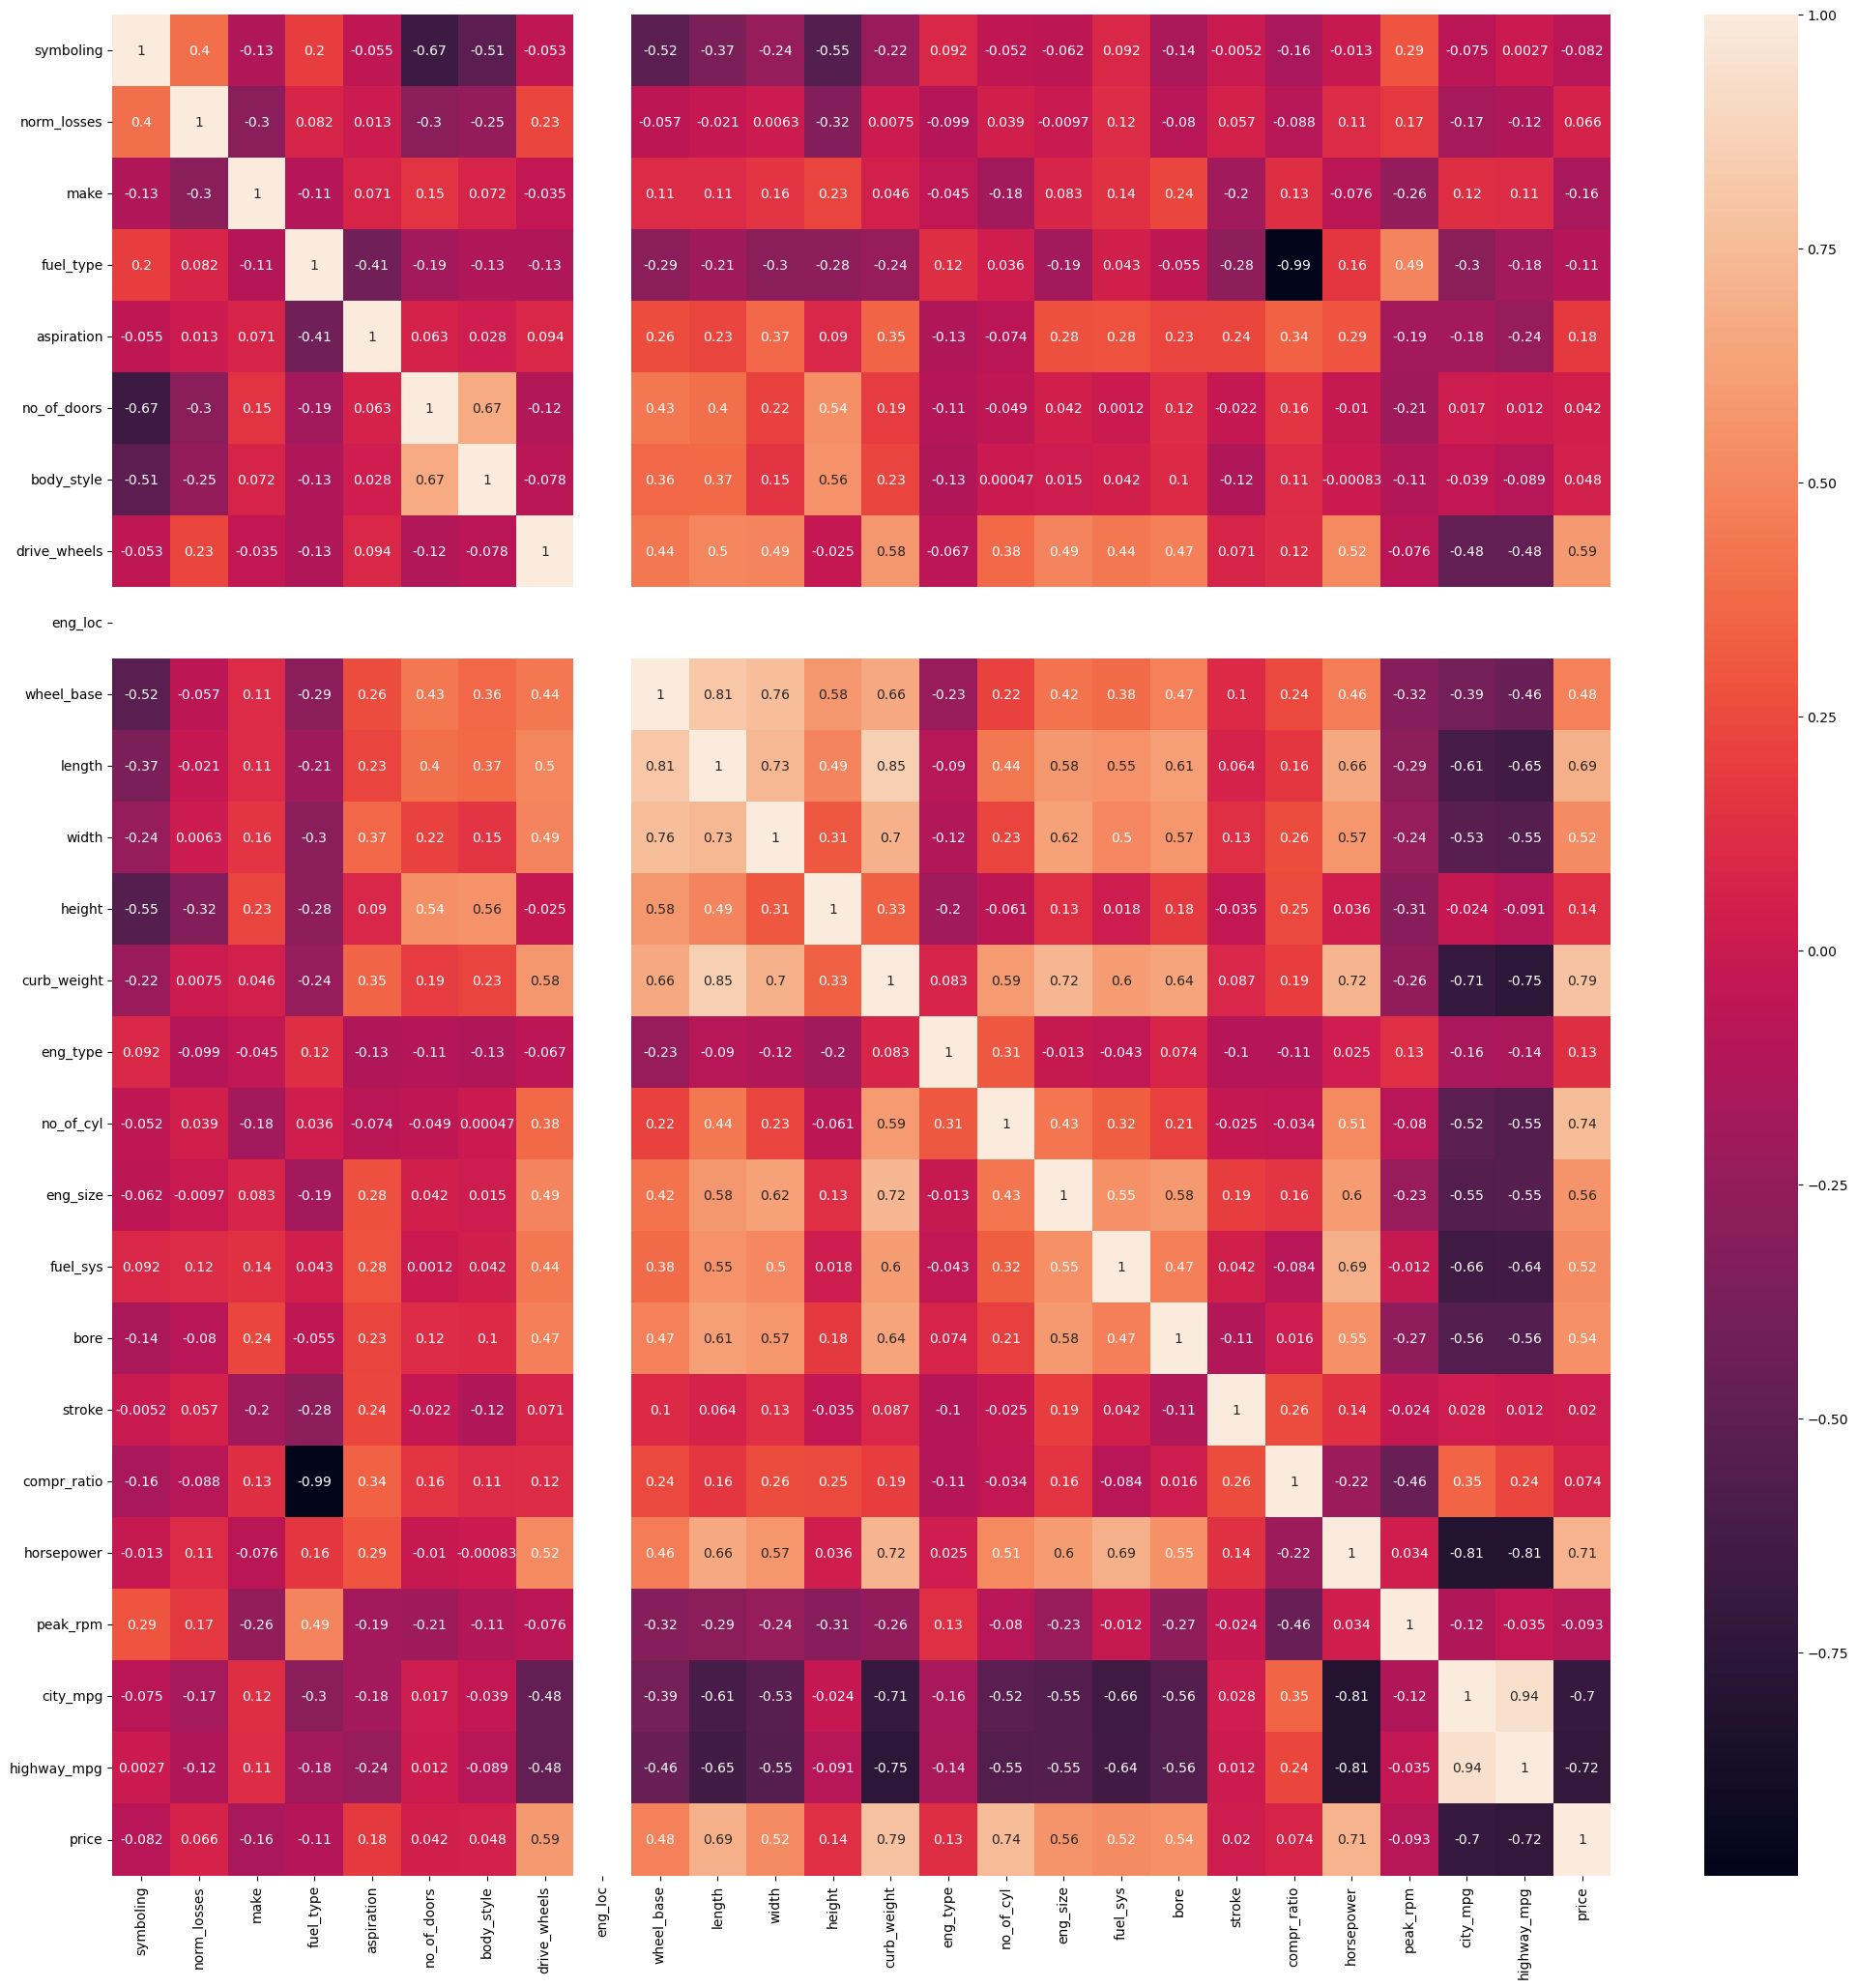

In [113]:
# Checking for correlation
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [114]:
df.describe()

symboling  norm_losses        make   fuel_type  aspiration  \
count  201.000000   201.000000  201.000000  201.000000  201.000000   
mean     0.840796   117.064677   12.298507    0.900498    0.179104   
std      1.254802    26.533579    6.253035    0.300083    0.384397   
min     -2.000000    65.000000    0.000000    0.000000    0.000000   
25%      0.000000   101.000000    8.000000    1.000000    0.000000   
50%      1.000000   115.000000   12.000000    1.000000    0.000000   
75%      2.000000   134.000000   19.000000    1.000000    0.000000   
max      3.000000   188.000000   21.000000    1.000000    1.000000   

       no_of_doors  body_style  drive_wheels  eng_loc  wheel_base      length  \
count   201.000000  201.000000    201.000000    201.0  201.000000  201.000000   
mean      3.144279    2.706468      1.333333      0.0   98.493035  174.200995   
std       0.992008    0.733763      0.550757      0.0    5.611618   12.322175   
min       2.000000    1.000000      0.000000      0.0   86.600000  141.100000   
25%       2.000000    2.000000      1.000000      0.0   94.500000  166.800000   
50%       4.000000    3.000000      1.000000      0.0   97.000000  173.200000   
75%       4.000000    3.000000      2.000000      0.0  101.200000  183.500000   
max       4.000000    4.000000      2.000000      0.0  114.200000  208.100000   

            width      height  curb_weight    eng_type   no_of_cyl  \
count  201.000000  201.000000   201.000000  201.000000  201.000000   
mean    65.624876   53.766667  2539.228856    2.084577    4.407960   
std      1.645168    2.447822   494.685736    0.898783    1.001367   
min     61.800000   47.800000  1488.000000    0.000000    4.000000   
25%     64.200000   52.000000  2169.000000    2.000000    4.000000   
50%     65.500000   54.100000  2414.000000    2.000000    4.000000   
75%     66.500000   55.500000  2912.000000    2.000000    4.000000   
max     70.300000   59.800000  3950.000000    5.000000   12.000000   

         eng_size    fuel_sys        bore      stroke  compr_ratio  \
count  201.000000  201.000000  201.000000  201.000000   201.000000   
mean   120.164179    3.258706    3.330299    3.239701    10.223980   
std     27.860867    2.013141    0.268088    0.291714     3.971958   
min     61.000000    0.000000    2.540000    2.070000     7.500000   
25%     98.000000    1.000000    3.150000    3.110000     8.700000   
50%    120.000000    5.000000    3.310000    3.290000     9.000000   
75%    136.000000    5.000000    3.580000    3.400000     9.400000   
max    194.000000    7.000000    3.940000    3.860000    23.000000   

       horsepower     peak_rpm    city_mpg  highway_mpg         price  
count  201.000000   201.000000  201.000000   201.000000    201.000000  
mean   100.288557  5104.477612   24.940299    30.353234  13207.129353  
std     32.488557   454.510562    5.999701     6.266546   7947.066342  
min     48.000000  4150.000000   13.000000    16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000    25.000000   7775.000000  
50%     95.000000  5200.000000   24.000000    30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000    34.000000  16500.000000  
max    184.000000  6000.000000   45.000000    47.000000  45400.000000

In [115]:
# eng_loc feature has single value throughout after converting it to numerical and handling its outliers. Also its std is 0.
# So will be dropping this feature

print(df.eng_loc.value_counts())
df.drop('eng_loc',axis=1,inplace=True)

0    201
Name: eng_loc, dtype: int64


In [116]:
# Dropping compr_ratio as it has highly negative correlation with fuel_type
# Also dropping highway_mpg as it has highly positive correlation with city_mpg

df.drop(['compr_ratio','highway_mpg'],axis=1,inplace=True)

In [117]:
df

symboling  norm_losses  make  fuel_type  aspiration  no_of_doors  \
0            3        115.0     0          1           0            2   
1            3        115.0     0          1           0            2   
2            1        115.0     0          1           0            2   
3            2        164.0     1          1           0            4   
4            2        164.0     1          1           0            4   
5            2        115.0     1          1           0            2   
6            1        158.0     1          1           0            4   
7            1        115.0     1          1           0            4   
8            1        158.0     1          1           1            4   
9            2        115.0     2          1           0            2   
10           0        115.0     2          1           0            4   
11           0        188.0     2          1           0            2   
12           0        188.0     2          1           0            4   
13           1        115.0     2          1           0            4   
14           0        115.0     2          1           0            4   
15           0        115.0     2          1           0            2   
16           0        115.0     2          1           0            4   
17           2        121.0     3          1           0            2   
18           1         98.0     3          1           0            2   
19           0         81.0     3          1           0            4   
20           1        118.0     4          1           0            2   
21           1        118.0     4          1           0            2   
22           1        118.0     4          1           1            2   
23           1        148.0     4          1           0            4   
24           1        148.0     4          1           0            4   
25           1        148.0     4          1           0            4   
26           1        148.0     4          1           1            4   
27          -1        110.0     4          1           0            4   
28           3        145.0     4          1           1            2   
29           2        137.0     5          1           0            2   
30           2        137.0     5          1           0            2   
31           1        101.0     5          1           0            2   
32           1        101.0     5          1           0            2   
33           1        101.0     5          1           0            2   
34           0        110.0     5          1           0            4   
35           0         78.0     5          1           0            4   
36           0        106.0     5          1           0            2   
37           0        106.0     5          1           0            2   
38           0         85.0     5          1           0            4   
39           0         85.0     5          1           0            4   
40           0         85.0     5          1           0            4   
41           1        107.0     5          1           0            2   
42           0        115.0     6          1           0            4   
43           2        115.0     6          1           0            2   
44           0        145.0     7          1           0            4   
45           0        115.0     7          1           0            4   
46           0        115.0     7          1           0            2   
47           1        104.0     8          1           0            2   
48           1        104.0     8          1           0            2   
49           1        104.0     8          1           0            2   
50           1        113.0     8          1           0            4   
51           1        113.0     8          1           0            4   
52           3        150.0     8          1           0            2   
53           3        150.0     8          1           0       

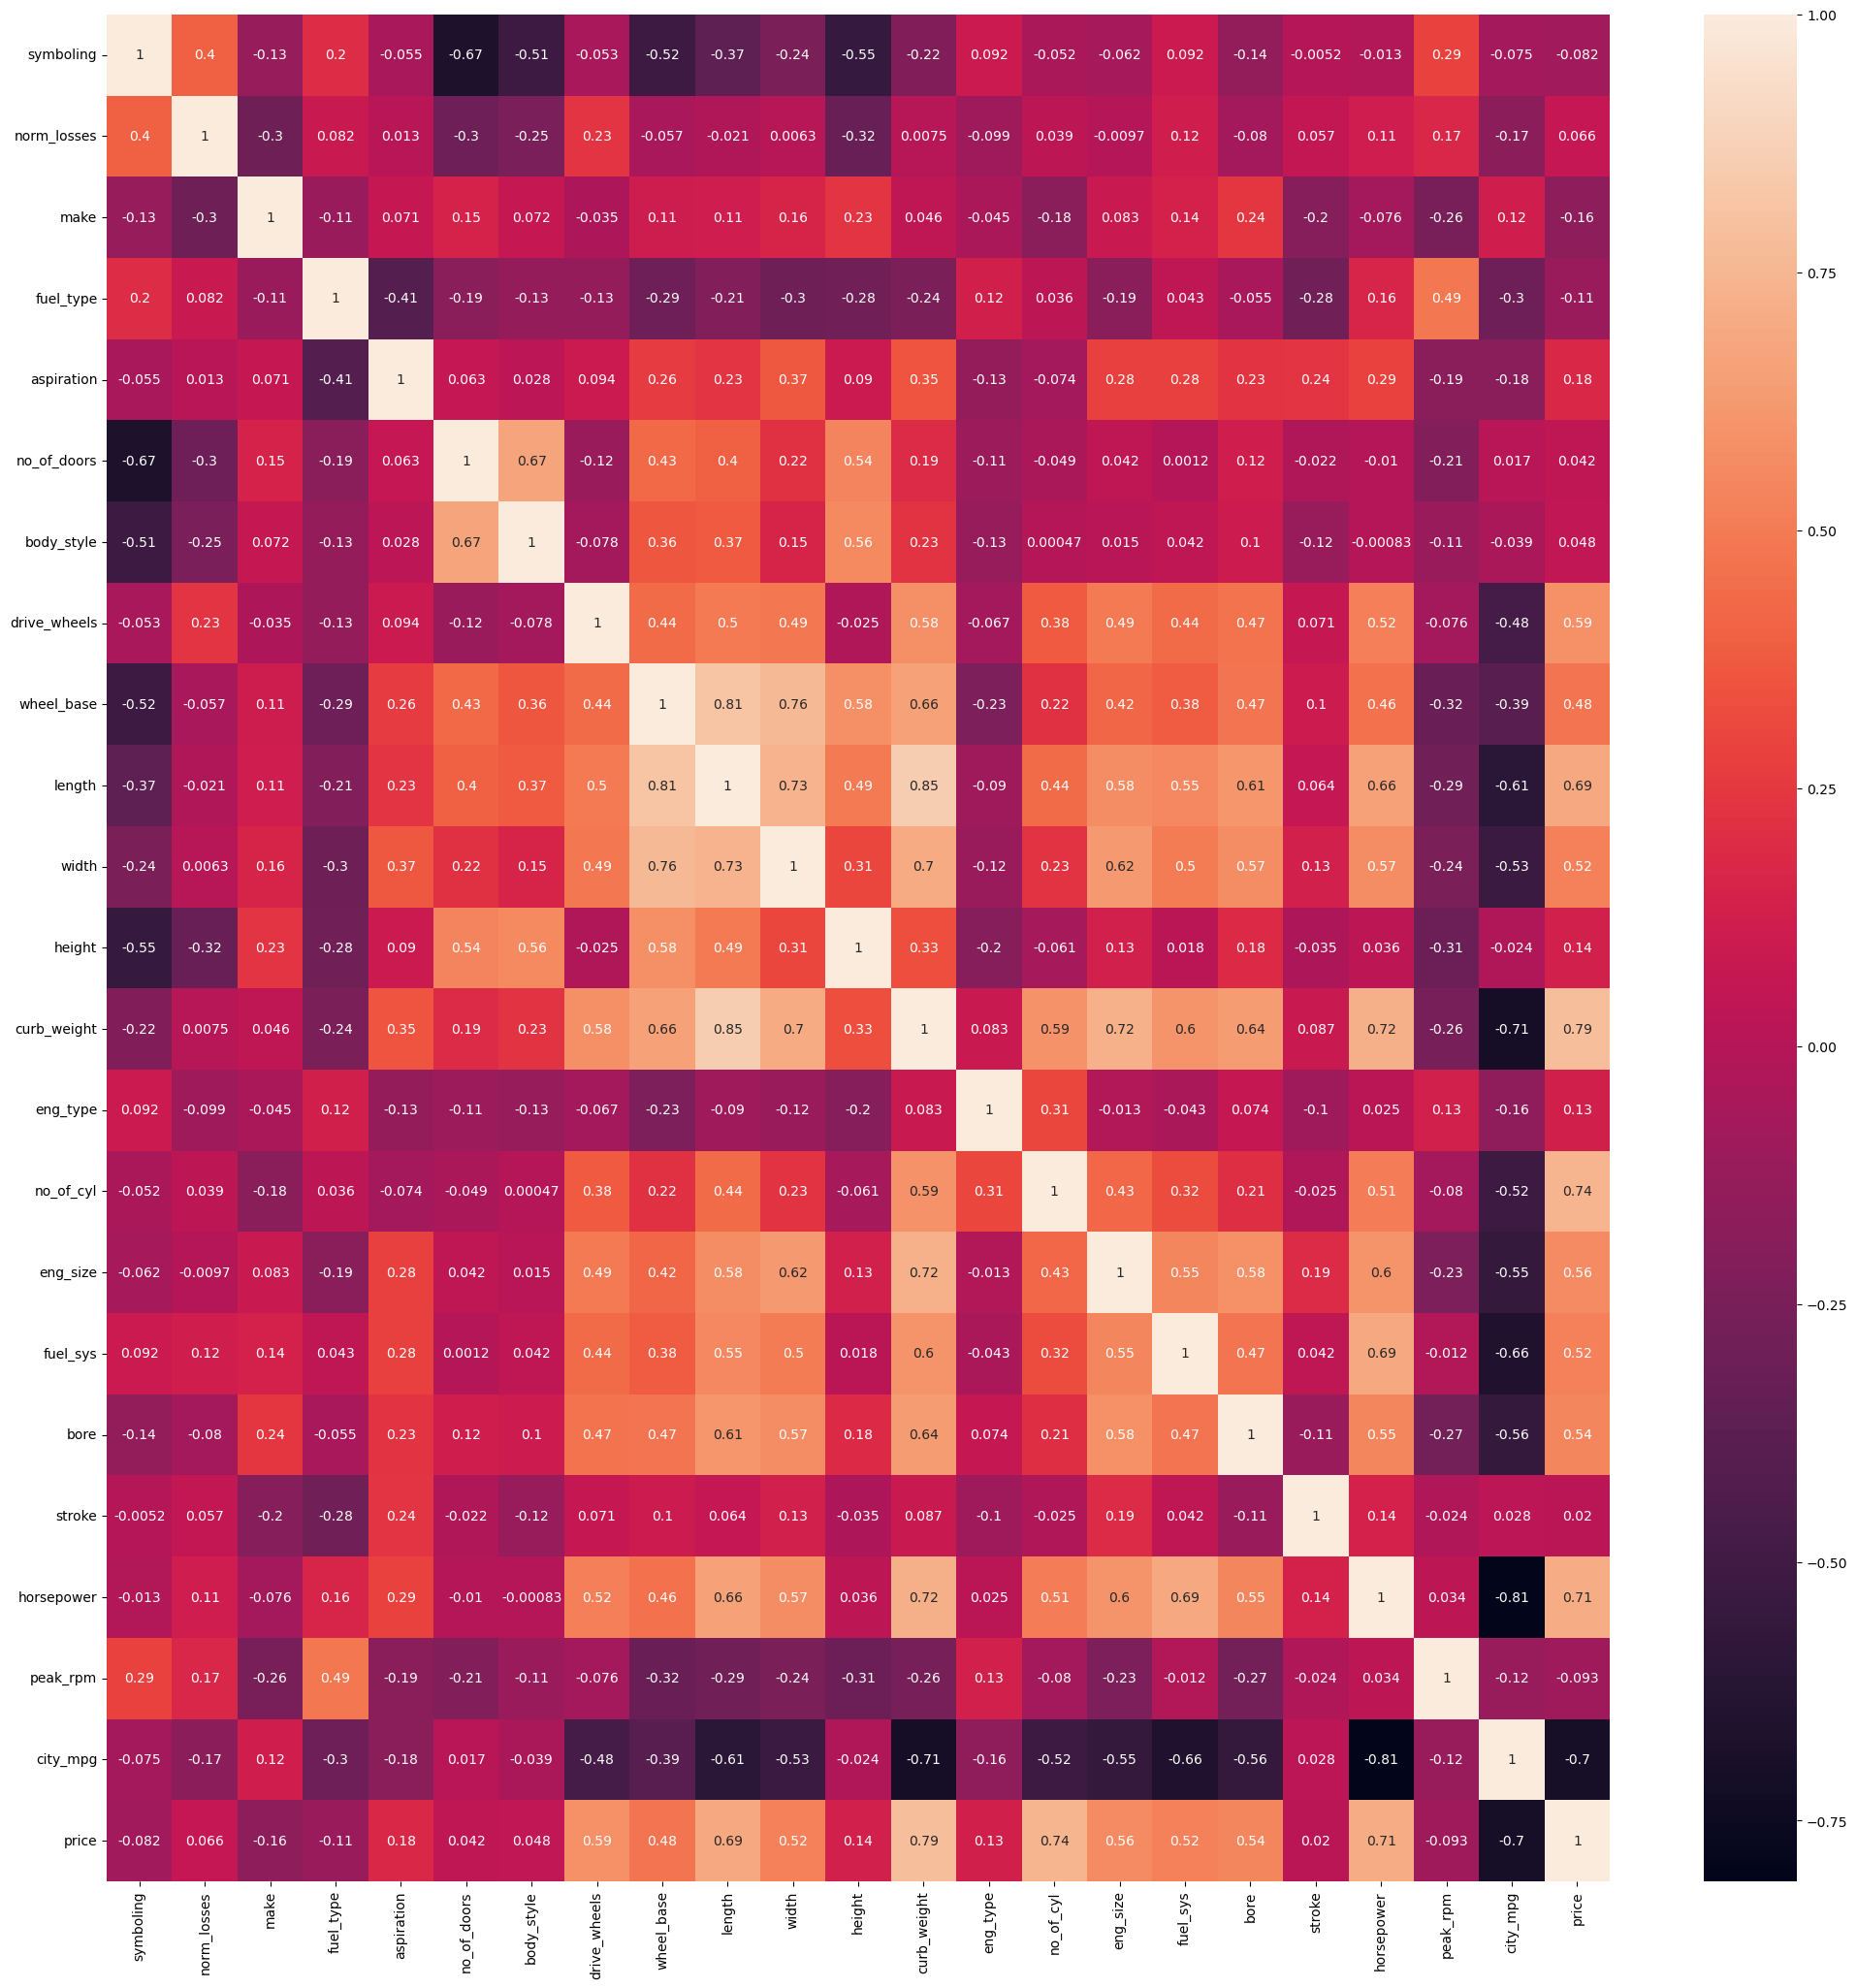

In [118]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)
plt.show()

**There are no more highly correlated features. Also constant column is removed.**

### **Checking for Duplicated rows**

In [119]:

df.duplicated().sum()

0

**There are no duplicate rows.**

# **Model Building and Evaluation**

In [120]:
# Identifying independent and dependent features
x = df.drop('price',axis=1)
y = df.price

In [121]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [122]:
# Splitting data into train and test data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)

(160, 22)
(41, 22)


# 1. Linear Regression

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tabulate import tabulate

# Initialize and train the model
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred_lr = lr.predict(x_train)
y_test_pred_lr = lr.predict(x_test)

# Model evaluation
train_acc_r2_lr = r2_score(y_train, y_train_pred_lr)
test_acc_r2_lr = r2_score(y_test, y_test_pred_lr)
adjusted_r2_test = (1 - ((1 - test_acc_r2_lr) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1))) * 100
msr_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_lr = np.sqrt(msr_lr)
mae_lr = mean_absolute_error(y_test, y_test_pred_lr)

# Prepare data for tabular output
table = [
    ["Training R2 Accuracy", f"{train_acc_r2_lr * 100:.2f}%"],
    ["Testing R2 Accuracy", f"{test_acc_r2_lr * 100:.2f}%"],
    ["Testing Adjusted R2 Score", f"{adjusted_r2_test:.2f}%"],
    ["MSE Score", f"{msr_lr:.2f}"],
    ["RMSE Score", f"{rmse_lr:.2f}"],
    ["MAE Score", f"{mae_lr:.2f}"]
]

# Print the table
print(tabulate(table, headers=["Metric", "Score"], tablefmt="grid"))


+---------------------------+-------------+
| Metric                    | Score       |
+===========================+=============+
| Training R2 Accuracy      | 86.53%      |
+---------------------------+-------------+
| Testing R2 Accuracy       | 76.73%      |
+---------------------------+-------------+
| Testing Adjusted R2 Score | 48.29%      |
+---------------------------+-------------+
| MSE Score                 | 28470850.70 |
+---------------------------+-------------+
| RMSE Score                | 5335.81     |
+---------------------------+-------------+
| MAE Score                 | 3406.76     |
+---------------------------+-------------+


# 2.  KNN algorithm

In [124]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the KNN model
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_train_pred_knn = knn.predict(x_train)
y_test_pred_knn = knn.predict(x_test)

# Model evaluation
train_acc_r2_knn = r2_score(y_train, y_train_pred_knn)
test_acc_r2_knn = r2_score(y_test, y_test_pred_knn)
adjusted_r2_test_knn = (1 - ((1 - test_acc_r2_knn) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1))) * 100
msr_knn = mean_squared_error(y_test, y_test_pred_knn)
rmse_knn = np.sqrt(msr_knn)
mae_knn = mean_absolute_error(y_test, y_test_pred_knn)

# Prepare data for tabular output
table_knn = [
    ["Training R2 Accuracy", f"{train_acc_r2_knn * 100:.2f}%"],
    ["Testing R2 Accuracy", f"{test_acc_r2_knn * 100:.2f}%"],
    ["Testing Adjusted R2 Score", f"{adjusted_r2_test_knn:.2f}%"],
    ["MSE Score", f"{msr_knn:.2f}"],
    ["RMSE Score", f"{rmse_knn:.2f}"],
    ["MAE Score", f"{mae_knn:.2f}"]
]

# Print the table
print(tabulate(table_knn, headers=["Metric", "Score"], tablefmt="grid"))

+---------------------------+-------------+
| Metric                    | Score       |
+===========================+=============+
| Training R2 Accuracy      | 82.50%      |
+---------------------------+-------------+
| Testing R2 Accuracy       | 64.94%      |
+---------------------------+-------------+
| Testing Adjusted R2 Score | 22.08%      |
+---------------------------+-------------+
| MSE Score                 | 42900490.11 |
+---------------------------+-------------+
| RMSE Score                | 6549.85     |
+---------------------------+-------------+
| MAE Score                 | 3946.41     |
+---------------------------+-------------+


# 3.  SVM algorithm

In [125]:
from sklearn.svm import SVR

# Initialize and train the SVR model
svr = SVR()
svr.fit(x_train, y_train)
y_train_pred_svr = svr.predict(x_train)
y_test_pred_svr = svr.predict(x_test)

# Model evaluation
train_acc_r2_svr = r2_score(y_train, y_train_pred_svr)
test_acc_r2_svr = r2_score(y_test, y_test_pred_svr)
adjusted_r2_test_svr = (1 - ((1 - test_acc_r2_svr) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1))) * 100
msr_svr = mean_squared_error(y_test, y_test_pred_svr)
rmse_svr = np.sqrt(msr_svr)
mae_svr = mean_absolute_error(y_test, y_test_pred_svr)

# Prepare data for tabular output
table_svr = [
    ["Training R2 Accuracy", f"{train_acc_r2_svr * 100:.2f}%"],
    ["Testing R2 Accuracy", f"{test_acc_r2_svr * 100:.2f}%"],
    ["Testing Adjusted R2 Score", f"{adjusted_r2_test_svr:.2f}%"],
    ["MSE Score", f"{msr_svr:.2f}"],
    ["RMSE Score", f"{rmse_svr:.2f}"],
    ["MAE Score", f"{mae_svr:.2f}"]
]

# Print the table
print(tabulate(table_svr, headers=["Metric", "Score"], tablefmt="grid"))

+---------------------------+--------------+
| Metric                    | Score        |
+===========================+==============+
| Training R2 Accuracy      | -9.32%       |
+---------------------------+--------------+
| Testing R2 Accuracy       | -21.92%      |
+---------------------------+--------------+
| Testing Adjusted R2 Score | -170.93%     |
+---------------------------+--------------+
| MSE Score                 | 149165068.01 |
+---------------------------+--------------+
| RMSE Score                | 12213.32     |
+---------------------------+--------------+
| MAE Score                 | 7943.12      |
+---------------------------+--------------+


# 4. Decision Tree algorithm

In [126]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_train_pred_dt = dt.predict(x_train)
y_test_pred_dt = dt.predict(x_test)

# Model evaluation
train_acc_r2_dt = r2_score(y_train, y_train_pred_dt)
test_acc_r2_dt = r2_score(y_test, y_test_pred_dt)
adjusted_r2_test_dt = (1 - ((1 - test_acc_r2_dt) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1))) * 100
msr_dt = mean_squared_error(y_test, y_test_pred_dt)
rmse_dt = np.sqrt(msr_dt)
mae_dt = mean_absolute_error(y_test, y_test_pred_dt)

# Prepare data for tabular output
table_dt = [
    ["Training R2 Accuracy", f"{train_acc_r2_dt * 100:.2f}%"],
    ["Testing R2 Accuracy", f"{test_acc_r2_dt * 100:.2f}%"],
    ["Testing Adjusted R2 Score", f"{adjusted_r2_test_dt:.2f}%"],
    ["MSE Score", f"{msr_dt:.2f}"],
    ["RMSE Score", f"{rmse_dt:.2f}"],
    ["MAE Score", f"{mae_dt:.2f}"]
]

# Print the table
print(tabulate(table_dt, headers=["Metric", "Score"], tablefmt="grid"))

+---------------------------+-------------+
| Metric                    | Score       |
+===========================+=============+
| Training R2 Accuracy      | 99.90%      |
+---------------------------+-------------+
| Testing R2 Accuracy       | 88.24%      |
+---------------------------+-------------+
| Testing Adjusted R2 Score | 73.87%      |
+---------------------------+-------------+
| MSE Score                 | 14387502.68 |
+---------------------------+-------------+
| RMSE Score                | 3793.09     |
+---------------------------+-------------+
| MAE Score                 | 2160.15     |
+---------------------------+-------------+


# 5. Gradient Boosting algorithm

In [127]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
y_train_pred_gb = gb.predict(x_train)
y_test_pred_gb = gb.predict(x_test)

# Model evaluation
train_acc_r2_gb = r2_score(y_train, y_train_pred_gb)
test_acc_r2_gb = r2_score(y_test, y_test_pred_gb)
adjusted_r2_test_gb = (1 - ((1 - test_acc_r2_gb) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1))) * 100
msr_gb = mean_squared_error(y_test, y_test_pred_gb)
rmse_gb = np.sqrt(msr_gb)
mae_gb = mean_absolute_error(y_test, y_test_pred_gb)

# Prepare data for tabular output
table_gb = [
    ["Training R2 Accuracy", f"{train_acc_r2_gb * 100:.2f}%"],
    ["Testing R2 Accuracy", f"{test_acc_r2_gb * 100:.2f}%"],
    ["Testing Adjusted R2 Score", f"{adjusted_r2_test_gb:.2f}%"],
    ["MSE Score", f"{msr_gb:.2f}"],
    ["RMSE Score", f"{rmse_gb:.2f}"],
    ["MAE Score", f"{mae_gb:.2f}"]
]

# Print the table
print(tabulate(table_gb, headers=["Metric", "Score"], tablefmt="grid"))

+---------------------------+------------+
| Metric                    | Score      |
+===========================+============+
| Training R2 Accuracy      | 99.22%     |
+---------------------------+------------+
| Testing R2 Accuracy       | 95.22%     |
+---------------------------+------------+
| Testing Adjusted R2 Score | 89.37%     |
+---------------------------+------------+
| MSE Score                 | 5850925.33 |
+---------------------------+------------+
| RMSE Score                | 2418.87    |
+---------------------------+------------+
| MAE Score                 | 1628.37    |
+---------------------------+------------+


In [128]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


# 6. XGBoost algorithm

In [129]:
from xgboost import XGBRegressor

# Initialize and train the XGBoost model
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_train_pred_xgb = xgb.predict(x_train)
y_test_pred_xgb = xgb.predict(x_test)

# Model evaluation
train_acc_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_acc_r2_xgb = r2_score(y_test, y_test_pred_xgb)
adjusted_r2_test_xgb = (1 - ((1 - test_acc_r2_xgb) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1))) * 100
msr_xgb = mean_squared_error(y_test, y_test_pred_xgb)
rmse_xgb = np.sqrt(msr_xgb)
mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)

# Prepare data for tabular output
table_xgb = [
    ["Training R2 Accuracy", f"{train_acc_r2_xgb * 100:.2f}%"],
    ["Testing R2 Accuracy", f"{test_acc_r2_xgb * 100:.2f}%"],
    ["Testing Adjusted R2 Score", f"{adjusted_r2_test_xgb:.2f}%"],
    ["MSE Score", f"{msr_xgb:.2f}"],
    ["RMSE Score", f"{rmse_xgb:.2f}"],
    ["MAE Score", f"{mae_xgb:.2f}"]
]

# Print the table
print(tabulate(table_xgb, headers=["Metric", "Score"], tablefmt="grid"))

+---------------------------+------------+
| Metric                    | Score      |
+===========================+============+
| Training R2 Accuracy      | 99.90%     |
+---------------------------+------------+
| Testing R2 Accuracy       | 93.00%     |
+---------------------------+------------+
| Testing Adjusted R2 Score | 84.44%     |
+---------------------------+------------+
| MSE Score                 | 8565026.09 |
+---------------------------+------------+
| RMSE Score                | 2926.61    |
+---------------------------+------------+
| MAE Score                 | 1869.33    |
+---------------------------+------------+


# 7.Random Forest algorithm

In [130]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

# Model evaluation
train_acc_r2_rf = r2_score(y_train, y_train_pred_rf)
test_acc_r2_rf = r2_score(y_test, y_test_pred_rf)
adjusted_r2_test_rf = (1 - ((1 - test_acc_r2_rf) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1))) * 100
msr_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_rf = np.sqrt(msr_rf)
mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

# Prepare data for tabular output
table_rf = [
    ["Training R2 Accuracy", f"{train_acc_r2_rf * 100:.2f}%"],
    ["Testing R2 Accuracy", f"{test_acc_r2_rf * 100:.2f}%"],
    ["Testing Adjusted R2 Score", f"{adjusted_r2_test_rf:.2f}%"],
    ["MSE Score", f"{msr_rf:.2f}"],
    ["RMSE Score", f"{rmse_rf:.2f}"],
    ["MAE Score", f"{mae_rf:.2f}"]
]

# Print the table
print(tabulate(table_rf, headers=["Metric", "Score"], tablefmt="grid"))

+---------------------------+-------------+
| Metric                    | Score       |
+===========================+=============+
| Training R2 Accuracy      | 96.64%      |
+---------------------------+-------------+
| Testing R2 Accuracy       | 86.24%      |
+---------------------------+-------------+
| Testing Adjusted R2 Score | 69.43%      |
+---------------------------+-------------+
| MSE Score                 | 16829272.80 |
+---------------------------+-------------+
| RMSE Score                | 4102.35     |
+---------------------------+-------------+
| MAE Score                 | 2499.13     |
+---------------------------+-------------+


# Hyperparameter tuning

In [131]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]

random_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}
rf_clf = RandomForestRegressor(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf_clf,scoring='r2',param_distributions=random_grid,n_iter=100,verbose=2,cv=3,random_state=42,n_jobs=-1)

rf_cv.fit(x_train,y_train)
rf_best_params = rf_cv.best_params_
print(rf_best_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [132]:
# Initialize and train the tuned Random Forest model
rf_after = RandomForestRegressor(n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=None, bootstrap=False)
rf_after.fit(x_train, y_train)
y_train_pred_rfafter = rf_after.predict(x_train)
y_test_pred_rfafter = rf_after.predict(x_test)

# Model evaluation
train_acc_r2_rfafter = r2_score(y_train, y_train_pred_rfafter)
test_acc_r2_rfafter = r2_score(y_test, y_test_pred_rfafter)
adjusted_r2_test_rfafter = (1 - ((1 - test_acc_r2_rfafter) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1))) * 100
msr_rfafter = mean_squared_error(y_test, y_test_pred_rfafter)
rmse_rfafter = np.sqrt(msr_rfafter)
mae_rfafter = mean_absolute_error(y_test, y_test_pred_rfafter)

# Prepare data for tabular output
table_rf_after = [
    ["Training R2 Accuracy", f"{train_acc_r2_rfafter * 100:.2f}%"],
    ["Testing R2 Accuracy", f"{test_acc_r2_rfafter * 100:.2f}%"],
    ["Testing Adjusted R2 Score", f"{adjusted_r2_test_rfafter:.2f}%"],
    ["MSE Score", f"{msr_rfafter:.2f}"],
    ["RMSE Score", f"{rmse_rfafter:.2f}"],
    ["MAE Score", f"{mae_rfafter:.2f}"]
]

# Print the table
print(tabulate(table_rf_after, headers=["Metric", "Score"], tablefmt="grid"))

+---------------------------+------------+
| Metric                    | Score      |
+===========================+============+
| Training R2 Accuracy      | 99.90%     |
+---------------------------+------------+
| Testing R2 Accuracy       | 94.50%     |
+---------------------------+------------+
| Testing Adjusted R2 Score | 87.79%     |
+---------------------------+------------+
| MSE Score                 | 6724988.27 |
+---------------------------+------------+
| RMSE Score                | 2593.26    |
+---------------------------+------------+
| MAE Score                 | 1587.54    |
+---------------------------+------------+


**So far, Gradient Boosting and Random Forest algorithms have given the best scores**
    
- The training R2 accuracy using Gradient Boosting is: 99.22053302005716<br>
- The testing R2 accuracy using Gradient Boosting is: 94.9681530034094<br>
- Testing Adjusted R2 score is:  88.81811778535422<br>
- MSE score is:  6156302.426786809<br>
- RMSE score is:  2481.1897200308586<br>
- MAE score is:  1656.7798100138448<br>
    

**After Hyperparameter tuning**
- Training R2 score after Hyperparameter tuning on Random forest is: 99.89831862870213<br>
- Testing R2 score after Hyperparameter tuning on Random forest is: 94.451462613851<br>
- Testing Adjusted R2 score is:  87.6699169196689<br>
- MSE score is:  6788456.445239862<br>
- RMSE score is:  2605.466646349529<br>
- MAE score is:  1553.0564634146342

### **Checking for cross validation scores of all these models mainly Gradient Boost and Random Forest models**

In [138]:
from sklearn.model_selection import cross_val_score

score_lr = cross_val_score(lr,x,y,cv=3,scoring='r2')
print(score_lr)
print("Cross validation score of Linear Regression model is:",score_lr.mean())

score_knn = cross_val_score(knn,x,y,cv=3,scoring='r2')
print(score_knn)
print("Cross validation score of KNN model is:",score_knn.mean())

score_svr = cross_val_score(svr,x,y,cv=3,scoring='r2')
print(score_svr)
print("Cross validation score of SVR model is:",score_svr.mean())

score_dt = cross_val_score(dt,x,y,cv=3,scoring='r2')
print(score_dt)
print("Cross validation score of Decision Tree model is:",score_dt.mean())

score_gb = cross_val_score(gb,x,y,cv=3,scoring='r2')
print(score_gb)
print("Cross validation score of Gradient Boost model is:",score_gb.mean())

score_xgb = cross_val_score(xgb,x,y,cv=3,scoring='r2')
print(score_xgb)
print("Cross validation score of XG Boost model is:",score_xgb.mean())

score_rfafter = cross_val_score(rf_after,x,y,cv=3,scoring='r2')
print(score_rfafter)
print("Cross validation score of Random Forest model is:",score_rfafter.mean())

[ 0.6154544   0.36697642 -0.85743858]
Cross validation score of Linear Regression model is: 0.041664079961640975
[ 0.30571883  0.55311535 -0.69954503]
Cross validation score of KNN model is: 0.05309638233246209
[-0.20935183 -0.2448066  -0.01494369]
Cross validation score of SVR model is: -0.15636737650881907
[0.34676796 0.46158822 0.14603115]
Cross validation score of Decision Tree model is: 0.3181291103474599
[0.61669782 0.66808314 0.38004495]
Cross validation score of Gradient Boost model is: 0.5549419687221918
[0.55489592 0.5954966  0.5577236 ]
Cross validation score of XG Boost model is: 0.569372037970984
[0.78035047 0.58452827 0.58825152]
Cross validation score of Random Forest model is: 0.6510434190445987


**insight**

- Training R2 score after Hyperparameter tuning on Random forest is: 99.89831862870213<br>
-  Testing R2 score after Hyperparameter tuning on Random forest is: 94.451462613851<br>
- Testing Adjusted R2 score is:  87.6699169196689<br>
- MSE score is:  6788456.445239862<br>
- RMSE score is:  2605.466646349529<br>
- MAE score is:  1553.0564634146342<br>
- Cross validation score of Random Forest model is: 0.6510434190445987

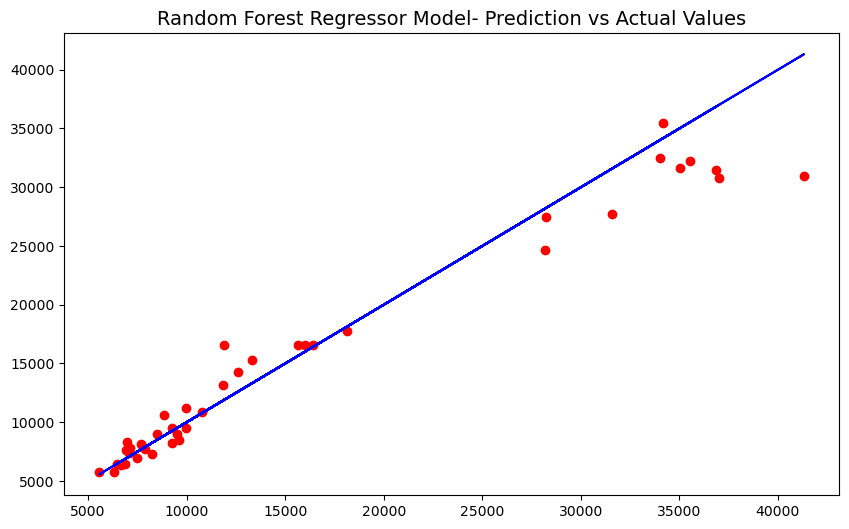

In [139]:
plt.figure(figsize = (10,6))
plt.title("Random Forest Regressor Model- Prediction vs Actual Values", fontsize = 14)
plt.scatter(x = y_test, y = y_test_pred_rfafter, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.show()

# <center> -: CONCLUSION :-

##  In this project we have to predict Autoprice prediction on the basis of given features,for that i have used different ML Algorithms:-

  - 1. Linear Regression
  - 2. KNN Regression
  - 3. SVM
  - 4. Decision Tree Regression
  - 5. GradientBoosting Regression
  - 6. XGB Regression
  - 7. RandomForest Regression
  
  
  
 

## BEST MODEL:-

_The best model based on the provided metrics is the **Random Forest model** comparitively has higher train, test and Cross validation scores and lower MSE, RMSE, MAE score, we choose this model for this problem_